In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ranksums

# First.

In [3]:
def G1(x):
  return 5 * (x[0] + x[1] + x[2] + x[3]) - 5 * sum(x[i]**2 for i in range(4)) - sum(x[i] for i in range(4, 13))

def G1_bounds_check(x):
    for i in range(9):
        if not (0 <= x[i] <= 1):
            return False
    for i in range(9, 12):
        if not (0 <= x[i] <= 100):
            return False
    if not (0 <= x[12] <= 1):
        return False
    return True

def constraint_1(x):
    return 2 * x[0] + 2 * x[1] + x[9] + x[10] <= 10

def constraint_2(x):
    return 2 * x[0] + 2 * x[2] + x[9] + x[11] <= 10

def constraint_3(x):
    return 2 * x[0] + 2 * x[3] + x[10] + x[11] <= 10

def constraint_4(x):
    return -8 * x[0] + x[12] <= 0

def constraint_5(x):
    return -8 * x[1] + x[9] <= 0

def constraint_6(x):
    return -8 * x[2] + x[10] <= 0

def constraint_7(x):
    return -8 * x[3] + x[11] <= 0

def constraint_8(x):
    return -2 * x[4] - x[5] + x[9] <= 0

def constraint_9(x):
    return -2 * x[6] - x[7] + x[10] <= 0

def constraint_10(x):
    return -2 * x[8] - x[12] + x[11] <= 0

# Define bounds for each variable in x
G1_bounds = [
    (0, 1),  # x1
    (0, 1),  # x2
    (0, 1),  # x3
    (0, 1),  # x4
    (0, 1),  # x5
    (0, 1),  # x6
    (0, 1),  # x7
    (0, 1),  # x8
    (0, 1),  # x9
    (0, 100),  # x10
    (0, 100),  # x11
    (0, 100),  # x12
    (0, 1)   # x13
]


In [4]:
def G4(x):
    return 3.5578574 * x[0]**2 + 0.8356891 * x[0] * x[4] + 37.293239 * x[0] - 40792.141

def G4_bounds_check(x, bounds):
    for i, (lower, upper) in enumerate(bounds):
        if not (lower <= x[i] <= upper):
            return False
    return True

def G4_constraint_1(x):
    value = 85.334407 + 0.0056858 * x[1] * x[4] + 0.0006262 * x[0] * x[3] - 0.0022053 * x[2] * x[4]
    return 0 <= value <= 92

def G4_constraint_2(x):
    value = 80.51249 + 0.0071317 * x[1] * x[4] + 0.0029955 * x[0] * x[1] + 0.0021813 * x[2]**2
    return 90 <= value <= 110

def G4_constraint_3(x):
    value = 9.300961 + 0.0047026 * x[2] * x[4] + 0.0012547 * x[0] * x[2] + 0.0019085 * x[2] * x[3]
    return 20 <= value <= 25


# Bounds for each variable in x
G4_bounds = [
    (78, 102),  # x1
    (33, 45),   # x2
    (27, 45),   # x3
    (27, 45),   # x4
    (27, 45)    # x5
]

In [5]:
def G5(x):
    return 3 * x[0] + 0.000001 * x[0]**3 + 2 * x[1] + (0.000002 / 3) * x[2]**3

def G5_bounds_check(x, bounds):
    for i, (lower, upper) in enumerate(bounds):
        if not (lower <= x[i] <= upper):
            return False
    return True

def G5_constraint_1(x):
    return x[3] - x[2] + 0.55 >= 0

def G5_constraint_2(x):
    return x[2] - x[3] + 0.55 >= 0

def G5_constraint_3(x):
    return np.isclose(1000 * np.sin(x[1] - x[0] - 0.25) + 1000 * np.sin(x[3] - x[2] - 0.25) + 894.8 - x[0], 0, atol=1e-6)

def G5_constraint_4(x):
    return np.isclose(1000 * np.sin(x[0] - x[1] - 0.25) + 1000 * np.sin(x[2] - x[3] - 0.25) + 894.8 - x[1], 0, atol=1e-6)

def G5_constraint_5(x):
    return np.isclose(1000 * np.sin(x[3] - x[0] - 0.25) + 1000 * np.sin(x[2] - x[1] - 0.25) + 1294.8, 0, atol=1e-6)

# Bounds for each variable in x
G5_bounds = [
    (0, 1200),   # x1
    (0, 1200),   # x2
    (-0.55, 0.55),  # x3
    (-0.55, 0.55)   # x4
]


In [6]:
def G6(x):
    return (x[0] - 10)**3 + (x[1] - 20)**3

def G6_bounds_check(x, bounds):
    for i, (lower, upper) in enumerate(bounds):
        if not (lower <= x[i] <= upper):
            return False
    return True

def G6_constraint_1(x):
    return (x[0] - 5)**2 + (x[1] - 5)**2 - 100 >= 0

def G6_constraint_2(x):
    return -(x[0] - 6)**2 - (x[1] - 5)**2 + 82.81 >= 0

# Bounds for each variable in x
G6_bounds = [
    (13, 100),  # x1
    (0, 100)    # x2
]

In [7]:
PC_REAL = 0.9
PM_REAL = 0.01
N_C = 20

In [8]:
def clip_to_bounds(x, bounds):
    return np.array([np.clip(x[i], lower, upper) for i, (lower, upper) in enumerate(bounds)])

In [9]:
# Real encoding crossover (SBX) and mutation
def sbx_crossover(p1, p2, nc):
  child1, child2 = np.zeros_like(p1), np.zeros_like(p2)
  for i in range(len(p1)):
    u = np.random.rand()
    if u <= 0.5:
      beta = (2 * u)**(1 / (nc + 1))
    else:
      beta = (1 / (2 * (1 - u)))**(1 / (nc + 1))
    child1[i] = 0.5 * ((1 + beta) * p1[i] + (1 - beta) * p2[i])
    child2[i] = 0.5 * ((1 - beta) * p1[i] + (1 + beta) * p2[i])
  return child1, child2

# Polynomial mutation
def poly_mutation(chrom, nm=20):
  x_max = max(chrom)
  x_min = min(chrom)
  for i, alelle in enumerate(chrom):
    r = np.random.rand()
    if r <= 0.5:
      delta_i = ((2*r)**(1/(nm+1)))-1
    else:
      delta_i = 1-((2*(1-r))**(1/(nm+1)))
    alelle += delta_i*(x_max - x_min)
    chrom[i] = alelle
  return chrom

In [10]:
# Genetic Algorithm framework
def genetic_algorithm(fitness_function, bounds, dim, ineq_constraints, eq_constraints, con1=4, con2=3, beta=1, gamma=2, f_thresh=0.5, delta=0.1, n_generations=100, pop_size=100, verbose=False):
    # Create initial population as real values
    population = [
    np.array([np.random.uniform(lower, upper) for lower, upper in bounds])
    for _ in range(pop_size)
    ]

    
    if verbose:
        print(f'Original population: {population}')

    best_fitness_per_gen = []
    
    for gen in range(n_generations):
        # Clip the values of the real population to ensure they stay within bounds
        real_population = [clip_to_bounds(ind, bounds) for ind in population]

        if verbose:
            print(f'Clipped population (generation {gen + 1}): {real_population}')

        # Evaluate fitness using penalty function
        fitness = []
        count_feasible = 0
        for individual in real_population:
            G_i, H_i = [], []
            is_feasible = True  # Track if the individual is feasible
            for constraint in ineq_constraints:
                violation = max(0, constraint(individual))**beta
                G_i.append(violation)
                if violation > 0:
                    is_feasible = False  # If any violation occurs, mark as infeasible
            for constraint in eq_constraints:
                violation = np.abs(constraint(individual))**gamma
                H_i.append(violation)
                if violation > 0:
                    is_feasible = False
            if is_feasible:
                count_feasible += 1
            
            violation = con1 * np.sum(G_i) + con2 * np.sum(H_i)
            fitness.append(fitness_function(individual) + violation)
    
        new_population = []
        copy_population = [list(ind) for ind in real_population]
        for _ in range(pop_size // 2):
            p1 = random.choice(copy_population)
            copy_population.pop(copy_population.index(p1))
            p2 = random.choice(copy_population)
            if np.random.rand() < PC_REAL:
                c1, c2 = sbx_crossover(p1, p2, N_C)
            else:
                c1, c2 = p1, p2
            if np.random.rand() < PM_REAL:
                c1 = poly_mutation(c1)
                c2 = poly_mutation(c2)
            
            c1 = clip_to_bounds(c1, bounds)
            c2 = clip_to_bounds(c2, bounds)
            
            new_population.extend([c1, c2])
        population = new_population

        # Track best fitness
        best_fitness = min(fitness)
        best_solution_index = fitness.index(best_fitness)
        best_solution = real_population[best_solution_index]
        best_fitness_per_gen.append(best_fitness)

        f_ratio = count_feasible/len(real_population)
        if f_ratio < f_thresh:
            con1 *= 1 - delta
            con2 *= 1 - delta
        else:
            con1 *= 1 + delta
            con2 *= 1 + delta

        if verbose:    
            print(f"Generation {gen + 1}, Best Fitness: {best_fitness}")

    return best_fitness_per_gen, best_solution

In [11]:
def get_cr_points(pr, n):
  indexes = list(range(n))
  j_star = random.sample(indexes, n // 2)

  for j in range(n):
    if random.random() < pr and j not in j_star:
      j_star.append(j)
  
  return j_star

In [12]:
def de(fitness_f, bounds, ineq_constraints, eq_constraints, n, pr=0.9, pop_size=100, con1=4, con2=3, beta=1, gamma=2, f_thresh=0.5, delta=0.1, generations=100, F=0.5, verbose=False):
    # Create initial population as real values
    population = [
        np.array([np.random.uniform(lower, upper) for lower, upper in bounds])
        for _ in range(pop_size)
    ]

    best_fitness_per_gen = []
    for gen in range(generations):
        # Clip the values of the real population to ensure they stay within bounds
        population = [clip_to_bounds(ind, bounds) for ind in population]

        # Evaluate fitness using penalty function for constraint handling
        fitness = []
        count_feasible = 0
        for individual in population:
            G_i, H_i = [], []
            is_feasible = True  # Track if the individual is feasible
            for constraint in ineq_constraints:
                violation = max(0, constraint(individual))**beta
                G_i.append(violation)
                if violation > 0:
                    is_feasible = False  # If any violation occurs, mark as infeasible
            for constraint in eq_constraints:
                violation = np.abs(constraint(individual))**gamma
                H_i.append(violation)
                if violation > 0:
                    is_feasible = False
            if is_feasible:
                count_feasible += 1
        
            violation = con1 * np.sum(G_i) + con2 * np.sum(H_i)
            fitness.append(fitness_f(individual) + violation)

        new_pop = []
        for i, individual in enumerate(population):
            # Mutation using DE best/1/bin
            best = population[np.argmin(fitness)]
            x2, x3 = random.sample(population, 2)

            u = [best[j] + F*(x2[j] - x3[j]) for j in range(len(best))]

            # Recombination between trtial vector and a current parent
            cr_points = get_cr_points(pr, len(individual))
            child = [u[j] if j in cr_points else individual[j] for j in range(len(u))]

            if fitness_f(child) <= fitness[i]:
                new_pop.append(child)
            else:
                new_pop.append(individual)
        
        population = new_pop

        # Track best fitness
        best_fitness = min(fitness)
        best_solution_index = fitness.index(best_fitness)
        best_solution = population[best_solution_index]
        best_fitness_per_gen.append(best_fitness)

        f_ratio = count_feasible/len(population)
        if f_ratio < f_thresh:
            con1 *= 1 - delta
            con2 *= 1 - delta
        else:
            con1 *= 1 + delta
            con2 *= 1 + delta

        if verbose:    
            print(f"Generation {gen + 1}, Best Fitness: {best_fitness}")

    return best_fitness_per_gen, best_solution

In [13]:
ga_best_solutions = []
de_best_solutions = []

In [14]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(G1, 
                                      G1_bounds, 
                                      13, 
                                      ineq_constraints=[
                                        constraint_1,
                                        constraint_2,
                                        constraint_3,
                                        constraint_4,
                                        constraint_5,
                                        constraint_6,
                                        constraint_7,
                                        constraint_8,
                                        constraint_9,
                                        constraint_10
                                      ],
                                      eq_constraints=[]                                      )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G1_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G1(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [5.20762951e-02 9.33670840e-01 8.93013051e-01 1.00000000e+00
 8.22671143e-01 9.81868294e-01 9.00057774e-01 3.19347232e-03
 9.75966712e-01 1.00000000e+02 5.58124857e+01 4.49245015e+01
 1.00000000e+00] and feasability is True
Experiment 2, solution is [1.00000000e+00 9.94802373e-01 9.89768740e-01 3.31203505e-02
 0.00000000e+00 2.08187293e-02 9.44875911e-01 0.00000000e+00
 3.10798648e-02 5.14335273e+01 8.02542800e+01 1.00000000e+02
 1.00000000e+00] and feasability is True
Experiment 3, solution is [ 0.55692817  0.72338057  0.35298702  0.78723203  0.70607886  0.29658806
  0.56508232  0.26109985  0.8183234  98.66835166 69.37454153 33.37061904
  0.8007195 ] and feasability is True
Experiment 4, solution is [ 0.          0.          0.26420103  0.          1.          0.47809146
  1.          1.          0.50567234 43.54014784 97.57094324 92.19384156
  0.        ] and feasability is True
Experiment 5, solution is [3.98402855e-02 4.10767060e-01 8.84988393e-01 3.274874

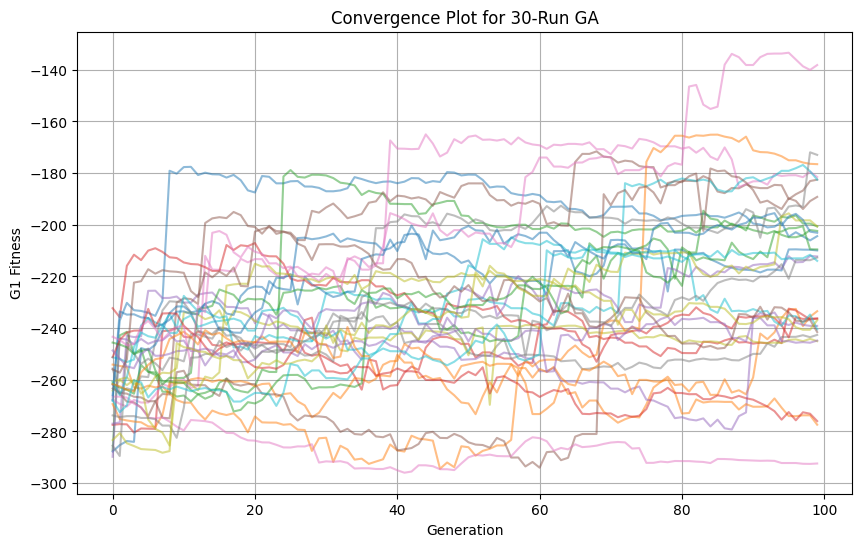

In [15]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G1 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [16]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(G1, 
                        G1_bounds, 
                        ineq_constraints=[
                                  constraint_1,
                                  constraint_2,
                                  constraint_3,
                                  constraint_4,
                                  constraint_5,
                                  constraint_6,
                                  constraint_7,
                                  constraint_8,
                                  constraint_9,
                                  constraint_10
                                ],
                        eq_constraints=[],
                        n=13
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G1_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G1(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [2.09035101e-04 9.99979486e-01 1.05219988e-09 9.99867947e-01
 9.99531537e-01 9.34926751e-02 9.99999998e-01 9.96230381e-01
 3.97626542e-02 1.00000000e+02 1.00000000e+02 1.00000000e+02
 2.61302714e-02] and feasability is True
Experiment 2, solution is [0.0014468963330662333, 0.9932194304307397, 0.9943713410062932, 1.0, 1.0, 0.9986849267281994, 0.7081333358936306, 0.9983902991070178, 0.9413812182414154, 100.0, 100.0, 99.99832378597546, 0.9992969701829949] and feasability is True
Experiment 3, solution is [0.9995503237470456, 0.0005784181617880577, 1.0, 0.002916260384193926, 0.663750484638327, 0.9991502359950315, 0.9961974384420755, 0.9999919756084503, 0.5166130819093862, 99.99998459303026, 100.0, 99.99997486184776, 0.9999977770898001] and feasability is True
Experiment 4, solution is [0.9999617251908083, 1.0, 0.9997819959423859, 0.0017639295974733289, 0.5222786217426979, 0.9224391458087351, 0.9979018962911116, 0.29223171766159883, 0.03260493534165342, 99.99231125

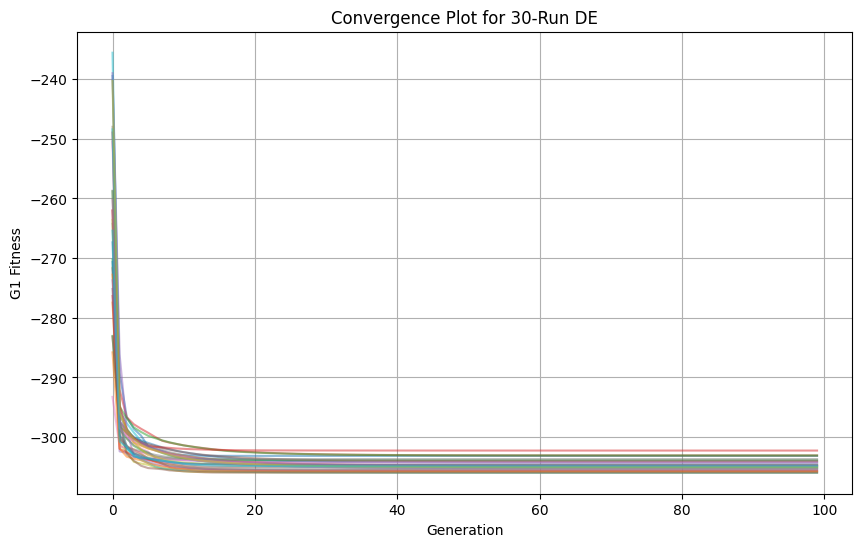

In [17]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G1 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [18]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(G4, 
                                      G4_bounds, 
                                      5, 
                                      ineq_constraints=[
                                        G4_constraint_1,
                                        G4_constraint_2,
                                        G4_constraint_3
                                      ],
                                      eq_constraints=[]                                      )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G4_bounds_check(sol, G4_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G4(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [78.         36.6400801  29.31381884 42.30556943 27.        ] and feasability is True
Experiment 2, solution is [78.00030963 45.         42.35880819 27.         29.58392732] and feasability is True
Experiment 3, solution is [78.01892505 38.341333   43.34159617 30.35510992 41.81368521] and feasability is True
Experiment 4, solution is [79.81594287 37.52870767 44.40884166 36.87323456 39.4183492 ] and feasability is True
Experiment 5, solution is [88.69186178 33.03759784 37.11099011 40.34026299 42.40088523] and feasability is True
Experiment 6, solution is [86.64659858 38.78334664 34.10451563 35.80292402 40.76176451] and feasability is True
Experiment 7, solution is [91.87178462 44.5286549  30.88766926 37.36607064 42.5472268 ] and feasability is True
Experiment 8, solution is [79.12879006 37.48162772 27.95108337 29.5328743  36.43200944] and feasability is True
Experiment 9, solution is [84.2769533  44.28128884 43.23537286 35.51265405 33.67092015] and feasability 

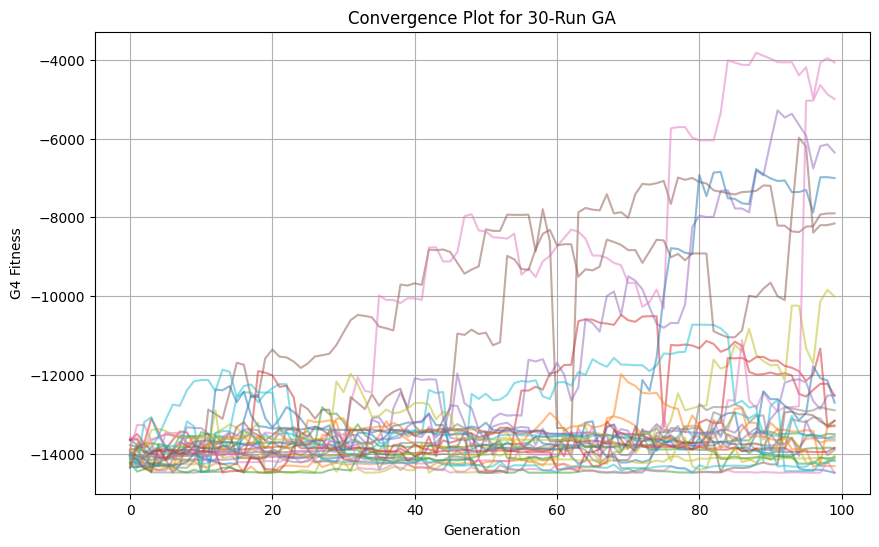

In [19]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G4 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [20]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(G4, 
                        G4_bounds, 
                        ineq_constraints=[
                                  G4_constraint_1,
                                  G4_constraint_2,
                                  G4_constraint_3,
                                ],
                        eq_constraints=[],
                        n=5
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G4_bounds_check(sol, G4_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G4(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [78.0, 44.92544144989881, 30.697644412602692, 44.986114750096306, 27.0] and feasability is True
Experiment 2, solution is [78.0, 43.67956445859065, 27.006550957481686, 43.56189756691849, 27.0] and feasability is True
Experiment 3, solution is [78.0, 44.9999971732821, 27.44876313429968, 40.24155900989649, 27.0] and feasability is True
Experiment 4, solution is [78.0, 34.45329715242591, 34.75474575237132, 30.038301449378782, 27.0] and feasability is True
Experiment 5, solution is [78.0, 43.12900655486345, 38.64589294809279, 27.017327629789296, 27.0] and feasability is True
Experiment 6, solution is [78.0, 33.00573830770189, 32.29059928542536, 33.39631459664113, 27.0] and feasability is True
Experiment 7, solution is [78.0, 35.24672748007372, 27.26546232715954, 38.40985243008099, 27.0] and feasability is True
Experiment 8, solution is [78.0, 44.92505921780528, 29.04525671815876, 44.99892283838853, 27.0] and feasability is True
Experiment 9, solution is [78.0, 42.

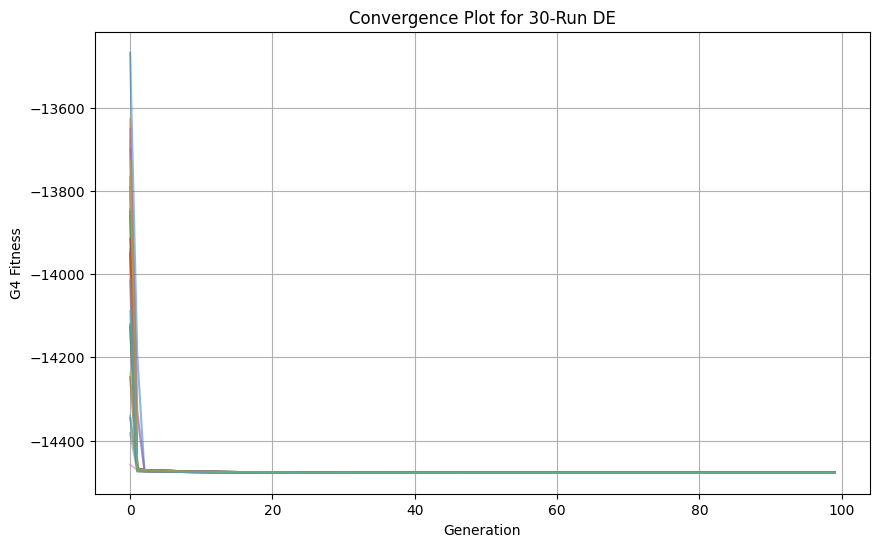

In [21]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G4 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [22]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(G5, 
                                      G5_bounds, 
                                      4, 
                                      ineq_constraints=[
                                        G5_constraint_1,
                                        G5_constraint_2,
                                        G5_constraint_3,
                                        G5_constraint_4,
                                        G5_constraint_5
                                      ],
                                      eq_constraints=[]                                      )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G5_bounds_check(sol, G5_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G5(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [ 3.63579944e+02  7.97823017e+02  5.30877714e-01 -5.46244402e-01] and feasability is True
Experiment 2, solution is [3.75265955e+02 3.47343427e+01 3.13394850e-01 5.50000000e-01] and feasability is True
Experiment 3, solution is [ 6.0670685e+02  6.7080146e+02 -5.5000000e-01  5.5000000e-01] and feasability is True
Experiment 4, solution is [ 5.40498889e+02  8.13521557e+02  4.32685933e-01 -4.03582886e-01] and feasability is True
Experiment 5, solution is [145.59754907   5.05994643   0.55        -0.53299016] and feasability is True
Experiment 6, solution is [ 2.27772805e+02  4.39223048e+02  6.10063269e-02 -3.61334996e-01] and feasability is True
Experiment 7, solution is [2.02989163e+02 7.95481682e+02 5.43275012e-01 4.63966894e-01] and feasability is True
Experiment 8, solution is [ 3.56173663e+02  8.57460403e+02  3.38755621e-01 -3.08110623e-01] and feasability is True
Experiment 9, solution is [324.72366568   3.26838889  -0.4307965    0.4190964 ] and feasability 

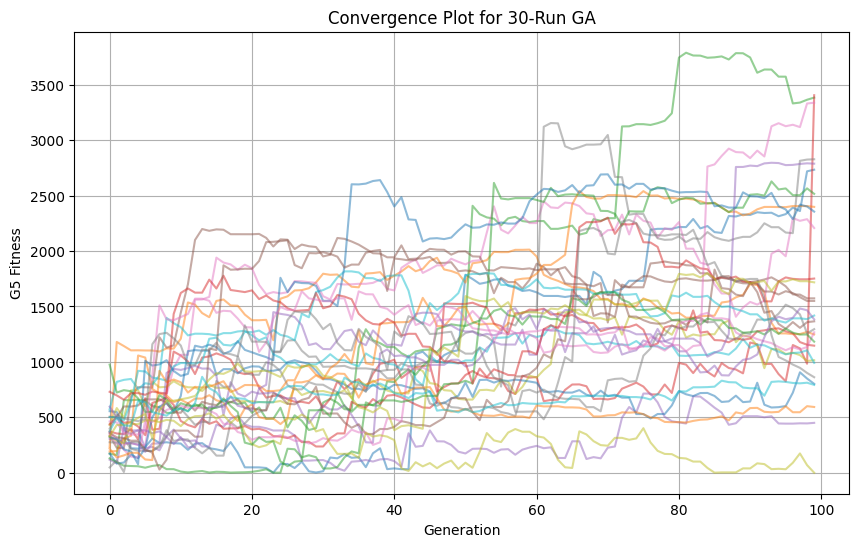

In [23]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G5 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [24]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(G5, 
                        G5_bounds, 
                        ineq_constraints=[
                                  G5_constraint_1,
                                  G5_constraint_2,
                                  G5_constraint_3,
                                  G5_constraint_4,
                                  G5_constraint_5
                                ],
                        eq_constraints=[],
                        n=4
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G5_bounds_check(sol, G5_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G5(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [0.0, 0.0, -0.55, 0.5499753793155429] and feasability is True
Experiment 2, solution is [0.0, 0.0, 0.00021438766081380945, -0.5499998347329595] and feasability is True
Experiment 3, solution is [0.0, 0.0, 0.0001663727716539143, -0.5499999758530981] and feasability is True
Experiment 4, solution is [0.0, 0.0, 0.00011683997444252921, -0.55] and feasability is True
Experiment 5, solution is [0.0, 0.0, -0.55, 0.30937658076548535] and feasability is True
Experiment 6, solution is [0.0, 0.0, 0.00018439410472983147, -0.55] and feasability is True
Experiment 7, solution is [0.0, 0.0, -0.55, 0.43999395559969734] and feasability is True
Experiment 8, solution is [0.0, 0.0, 9.407291242965653e-05, -0.5499972225207909] and feasability is True
Experiment 9, solution is [0.0, 0.0, -0.55, 0.07245851785595624] and feasability is True
Experiment 10, solution is [0.0, 0.0, 9.79227421182239e-05, -0.5499075240398377] and feasability is True
Experiment 11, solution is [0.0, 0.0, 0.

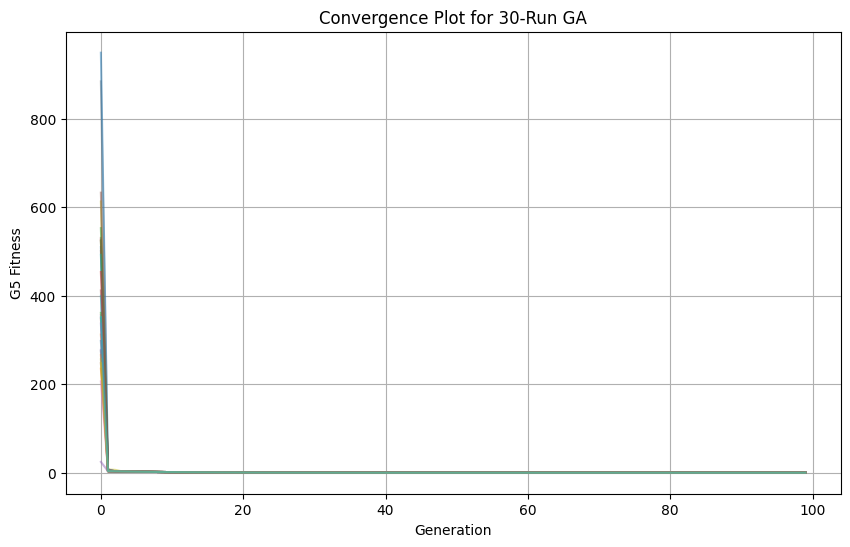

In [25]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G5 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [26]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(G6, 
                                      G6_bounds, 
                                      2, 
                                      ineq_constraints=[
                                        G6_constraint_1,
                                        G6_constraint_2
                                      ],
                                      eq_constraints=[]                                      )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G6_bounds_check(sol, G6_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G6(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [20.36233999 35.90635843] and feasability is True
Experiment 2, solution is [22.07023977 25.05056905] and feasability is True
Experiment 3, solution is [30.87134279  0.26232588] and feasability is True
Experiment 4, solution is [33.11017983 12.40183683] and feasability is True
Experiment 5, solution is [42.31460059 16.92014297] and feasability is True
Experiment 6, solution is [13.90761636 32.42829689] and feasability is True
Experiment 7, solution is [26.64732635 42.95411769] and feasability is True
Experiment 8, solution is [29.14163218 34.64650184] and feasability is True
Experiment 9, solution is [23.49978973 38.92266732] and feasability is True
Experiment 10, solution is [51.34307396 48.58934171] and feasability is True
Experiment 11, solution is [24.49223661 61.42952426] and feasability is True
Experiment 12, solution is [30.62702576 59.21823254] and feasability is True
Experiment 13, solution is [69.09920752 15.02436523] and feasability is True
Experime

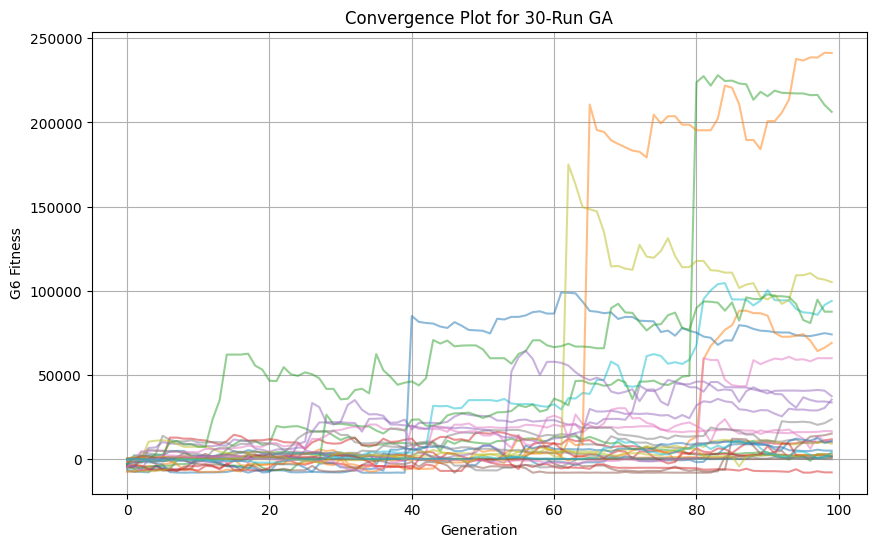

In [27]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G6 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [28]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(G6, 
                        G6_bounds, 
                        ineq_constraints=[
                                  G6_constraint_1,
                                  G6_constraint_2
                                ],
                        eq_constraints=[],
                        n=2
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = G6_bounds_check(sol, G6_bounds)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [G6(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [13.0, 0.0] and feasability is True
Experiment 2, solution is [13.0, 0.0] and feasability is True
Experiment 3, solution is [13.0, 0.0] and feasability is True
Experiment 4, solution is [13.0, 0.0] and feasability is True
Experiment 5, solution is [13.0, 0.0] and feasability is True
Experiment 6, solution is [13.0, 0.0] and feasability is True
Experiment 7, solution is [13.0, 0.0] and feasability is True
Experiment 8, solution is [13.0, 0.0] and feasability is True
Experiment 9, solution is [13.0, 0.0] and feasability is True
Experiment 10, solution is [13.0, 0.0] and feasability is True
Experiment 11, solution is [13.0, 0.0] and feasability is True
Experiment 12, solution is [13.0, 0.0] and feasability is True
Experiment 13, solution is [13.0, 0.0] and feasability is True
Experiment 14, solution is [13.0, 0.0] and feasability is True
Experiment 15, solution is [13.0, 0.0] and feasability is True
Experiment 16, solution is [13.0, 0.0] and feasability is True
E

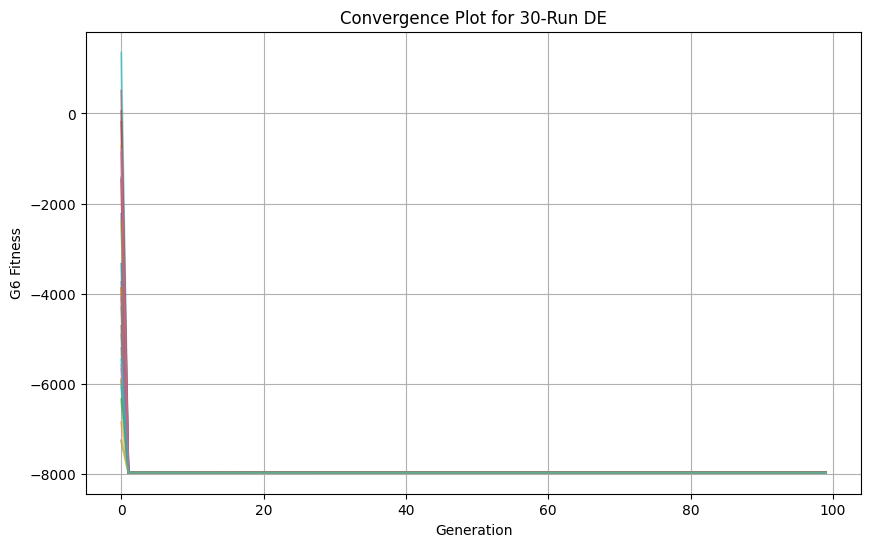

In [29]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("G6 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [30]:
problems = ['G1', 'G4', 'G5', 'G6']

# Perform Wilcoxon rank-sum test for each problem and determine the better algorithm
for i in range(4):
    ga_results = ga_best_solutions[i]
    de_results = de_best_solutions[i]

    # Perform the Wilcoxon rank-sum test
    stat, p_value = ranksums(ga_results, de_results)

    # Determine medians for GA and DE for better comparison
    ga_median = np.median(ga_results)
    de_median = np.median(de_results)

    print(f"Problem {problems[i]}:")
    print(f"  Wilcoxon rank-sum statistic: {stat}")
    print(f"  p-value: {p_value}")
    print(f"  GA median fitness: {ga_median}")
    print(f"  DE median fitness: {de_median}")

    # Interpretation based on p-value and median fitness
    alpha = 0.05
    if p_value < alpha:
        if ga_median < de_median:
            print("  Result: Statistically significant difference; GA is better for this problem.")
        else:
            print("  Result: Statistically significant difference; DE is better for this problem.")
    else:
        print("  Result: No statistically significant difference between GA and DE for this problem.")

Problem G1:
  Wilcoxon rank-sum statistic: 6.6529914385911555
  p-value: 2.8719490663203234e-11
  GA median fitness: -212.45555130426158
  DE median fitness: -304.7888776877488
  Result: Statistically significant difference; DE is better for this problem.
Problem G4:
  Wilcoxon rank-sum statistic: 6.209458676018412
  p-value: 5.316742803642794e-10
  GA median fitness: -13400.742341983445
  DE median fitness: -14477.302691800007
  Result: Statistically significant difference; DE is better for this problem.
Problem G5:
  Wilcoxon rank-sum statistic: 6.416440631885693
  p-value: 1.394973133218814e-10
  GA median fitness: 1401.079700954276
  DE median fitness: 2.3227462074346715e-20
  Result: Statistically significant difference; DE is better for this problem.
Problem G6:
  Wilcoxon rank-sum statistic: 6.6529914385911555
  p-value: 2.8719490663203234e-11
  GA median fitness: 11421.536344930533
  DE median fitness: -7973.0
  Result: Statistically significant difference; DE is better for thi

# Second.

In [31]:
def Layeb05(x):
    # Assuming x has exactly 2 elements: x1 and x2
    term1 = np.log(abs(np.sin(x[0] - np.pi / 2)) + abs(np.cos(x[1] - np.pi)) + 0.001)
    term2 = abs(np.cos(2 * x[0] - x[1] + np.pi / 2)) + 1
    result = term1 / term2
    return result

def Layeb05_bounds_check(x):
    return -10 <= x[0] <= 10 and -10 <= x[1] <= 10

Layeb05_bounds = [(-10, 10), (-10, 10)]  # Bounds for x1 and x2

In [32]:
def Layeb10(x):
    # Assuming x has exactly 2 elements: x1 and x2
    term1 = (np.log(x[0]**2 + x[1]**2 + 0.5))**2
    term2 = abs(100 * np.sin(x[0] - x[1]))
    result = term1 + term2
    return result

def Layeb10_bounds_check(x):
    return -100 <= x[0] <= 100 and -100 <= x[1] <= 100

Layeb10_bounds = [(-100, 100), (-100, 100)]  # Bounds for x1 and x2

In [33]:
def Layeb15(x):
    # Assuming x has exactly 2 elements: x1 and x2
    term1 = 10 * np.sqrt(np.tanh(2 * abs(x[0]) - x[1]**2 - 1))
    term2 = abs(np.exp(x[0] * x[1] + x[1]) - 1)
    result = term1 + term2
    return result

def Layeb15_bounds_check(x):
    return -100 <= x[0] <= 100 and -100 <= x[1] <= 100

Layeb15_bounds = [(-100, 100), (-100, 100)]  # Bounds for x1 and x2

In [34]:
def Layeb18(x):
    # Assuming x has exactly 2 elements: x1 and x2
    term1 = np.log(abs(np.cos(2 * x[0] * x[1] / np.pi)) + 0.001)
    term2 = abs(np.sin(x[0] + x[1]) * np.cos(x[0])) + 1
    result = term1 / term2
    return result

def Layeb18_bounds_check(x):
    return -10 <= x[0] <= 10 and -10 <= x[1] <= 10

Layeb18_bounds = [(-10, 10), (-10, 10)]  # Bounds for x1 and x2

In [35]:
ga_best_solutions = []
de_best_solutions = []

In [36]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(Layeb05, 
                                      Layeb05_bounds, 
                                      2, 
                                      ineq_constraints=[],
                                      eq_constraints=[]                                      
                                    )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb05_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb05(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [ 5.02416211 -7.7027027 ] and feasability is True
Experiment 2, solution is [5.12524457 7.91720298] and feasability is True
Experiment 3, solution is [ 1.79408839 -1.45059769] and feasability is True
Experiment 4, solution is [-5.08345958 -7.86458339] and feasability is True
Experiment 5, solution is [-4.621043  -4.5805768] and feasability is True
Experiment 6, solution is [-1.76736892  1.59059408] and feasability is True
Experiment 7, solution is [ 4.71703519 -7.83730029] and feasability is True
Experiment 8, solution is [ 7.60997883 -7.70742282] and feasability is True
Experiment 9, solution is [-4.49050209  7.91212126] and feasability is True
Experiment 10, solution is [5.00001822 1.64652356] and feasability is True
Experiment 11, solution is [-4.70563995 -1.69515816] and feasability is True
Experiment 12, solution is [ 7.91719317 -8.03473847] and feasability is True
Experiment 13, solution is [ 7.75186968 -1.56400593] and feasability is True
Experiment 14,

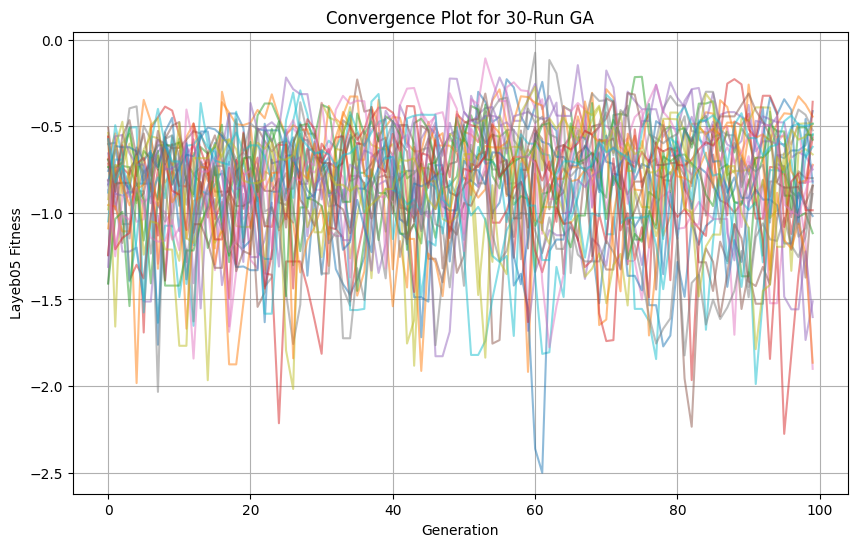

In [37]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb05 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [38]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(Layeb05, 
                        Layeb05_bounds, 
                        ineq_constraints=[],
                        eq_constraints=[],
                        n=2
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb05_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb05(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [4.71238898038469, 1.5707963267948966] and feasability is True
Experiment 2, solution is [4.71238898038469, 7.853981633974483] and feasability is True
Experiment 3, solution is [1.5707963267948966, 1.5707963267948966] and feasability is True
Experiment 4, solution is [-4.71238898038469, 1.5707963267948966] and feasability is True
Experiment 5, solution is [1.5707963267948966, -7.853981633974483] and feasability is True
Experiment 6, solution is [7.853981633974483, -1.5707963267948961] and feasability is True
Experiment 7, solution is [-7.853981633974483, 4.71238898038469] and feasability is True
Experiment 8, solution is [-1.5707963267948966, 7.853981633974483] and feasability is True
Experiment 9, solution is [1.5707963267948966, -4.71238898038469] and feasability is True
Experiment 10, solution is [-1.5707963267948966, 4.71238898038469] and feasability is True
Experiment 11, solution is [1.5707963267948966, 1.5707963267948966] and feasability is True
Experim

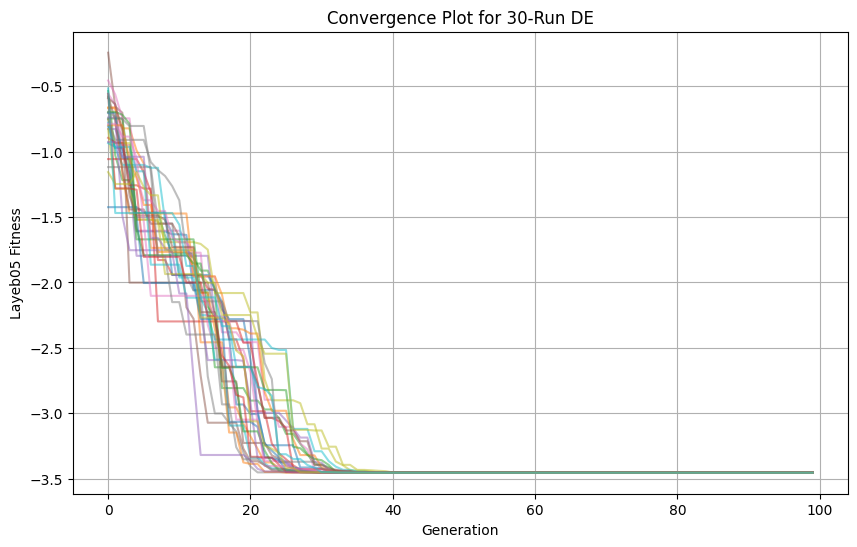

In [39]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb05 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [40]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(Layeb10, 
                                      Layeb10_bounds, 
                                      2, 
                                      ineq_constraints=[],
                                      eq_constraints=[]                                      
                                    )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb10_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb10(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [-27.94999007 -21.63590397] and feasability is True
Experiment 2, solution is [-13.9580448   30.03756181] and feasability is True
Experiment 3, solution is [71.60266824 30.75532815] and feasability is True
Experiment 4, solution is [-22.25752776 -16.09563054] and feasability is True
Experiment 5, solution is [ 90.48115786 -54.03829866] and feasability is True
Experiment 6, solution is [-2.40490021  3.66492189] and feasability is True
Experiment 7, solution is [-13.08097451   5.74341652] and feasability is True
Experiment 8, solution is [-1.72909539  4.53679756] and feasability is True
Experiment 9, solution is [-78.66808555  37.62169615] and feasability is True
Experiment 10, solution is [-26.97857023 -23.83421478] and feasability is True
Experiment 11, solution is [16.51677915 32.34415992] and feasability is True
Experiment 12, solution is [-20.79202348  51.56097258] and feasability is True
Experiment 13, solution is [-27.89842357   0.46813828] and feasabilit

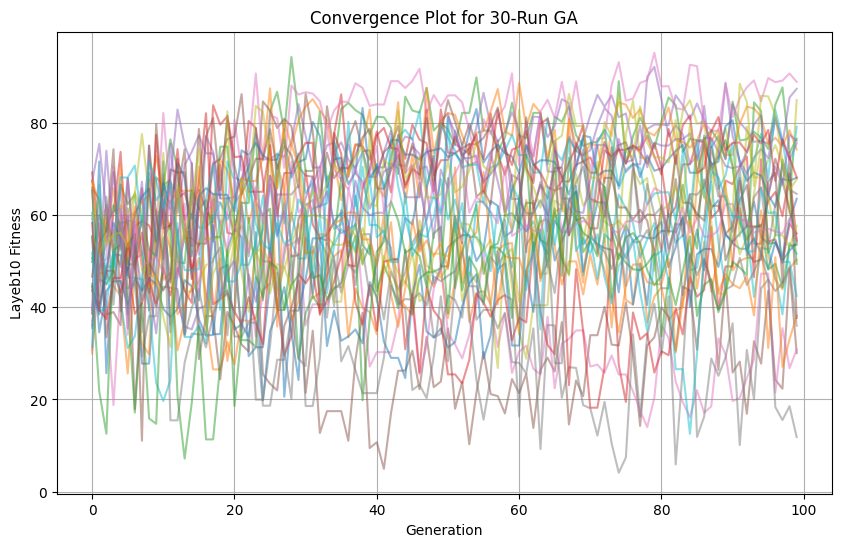

In [41]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb10 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [42]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(Layeb10, 
                        Layeb10_bounds, 
                        ineq_constraints=[],
                        eq_constraints=[],
                        n=2
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb10_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb10(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [0.5 0.5] and feasability is True
Experiment 2, solution is [0.5 0.5] and feasability is True
Experiment 3, solution is [-0.5 -0.5] and feasability is True
Experiment 4, solution is [0.5 0.5] and feasability is True
Experiment 5, solution is [-0.5, -0.5] and feasability is True
Experiment 6, solution is [-0.5 -0.5] and feasability is True
Experiment 7, solution is [0.5 0.5] and feasability is True
Experiment 8, solution is [0.5 0.5] and feasability is True
Experiment 9, solution is [0.5 0.5] and feasability is True
Experiment 10, solution is [0.5 0.5] and feasability is True
Experiment 11, solution is [-0.5 -0.5] and feasability is True
Experiment 12, solution is [0.5 0.5] and feasability is True
Experiment 13, solution is [-0.5 -0.5] and feasability is True
Experiment 14, solution is [-0.5, -0.5] and feasability is True
Experiment 15, solution is [-0.5 -0.5] and feasability is True
Experiment 16, solution is [0.5 0.5] and feasability is True
Experiment 17, so

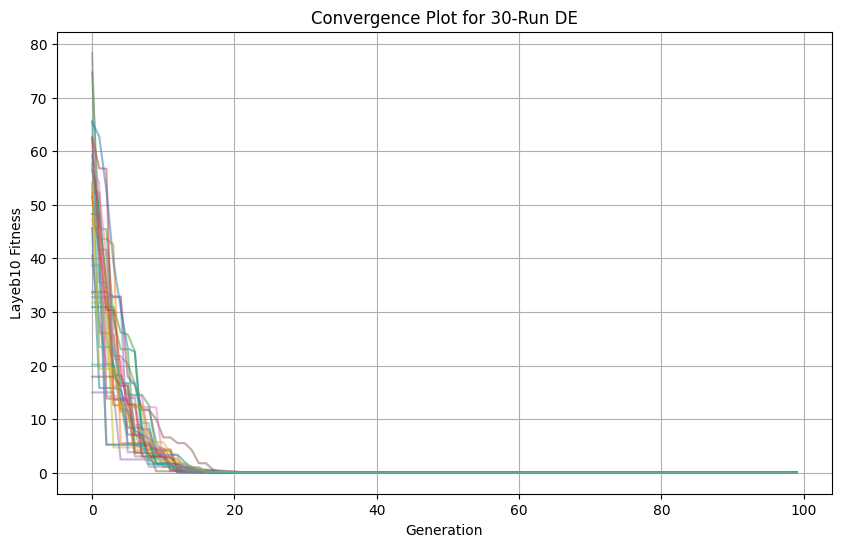

In [43]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb10 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [44]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(Layeb15, 
                                      Layeb15_bounds, 
                                      2, 
                                      ineq_constraints=[],
                                      eq_constraints=[]                                      
                                    )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb15_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb15(solution) for solution in solutions]
mean = np.nanmean(fitness_best_sol)
std_dev = np.nanstd(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

C:\Users\herna\AppData\Local\Temp\ipykernel_42168\874342480.py:3: RuntimeWarning: invalid value encountered in sqrt
  term1 = 10 * np.sqrt(np.tanh(2 * abs(x[0]) - x[1]**2 - 1))
C:\Users\herna\AppData\Local\Temp\ipykernel_42168\874342480.py:4: RuntimeWarning: overflow encountered in exp
  term2 = abs(np.exp(x[0] * x[1] + x[1]) - 1)


Experiment 1, solution is [ 24.34349793 -10.98711143] and feasability is True
Experiment 2, solution is [ 21.70911138 -34.91406531] and feasability is True
Experiment 3, solution is [-9.46164519 40.49306044] and feasability is True
Experiment 4, solution is [35.5007833 82.4355811] and feasability is True
Experiment 5, solution is [ 65.74395918 -34.26082057] and feasability is True
Experiment 6, solution is [-62.41366603 -58.10175123] and feasability is True
Experiment 7, solution is [ 27.85205671 -96.36454486] and feasability is True
Experiment 8, solution is [ 55.18073    -86.25174735] and feasability is True
Experiment 9, solution is [ 80.68860145 -44.22708002] and feasability is True
Experiment 10, solution is [40.76842555 78.8063551 ] and feasability is True
Experiment 11, solution is [-25.18068654 -89.42163667] and feasability is True
Experiment 12, solution is [ 85.28341829 -71.17385351] and feasability is True
Experiment 13, solution is [57.42523317 57.62494676] and feasability 

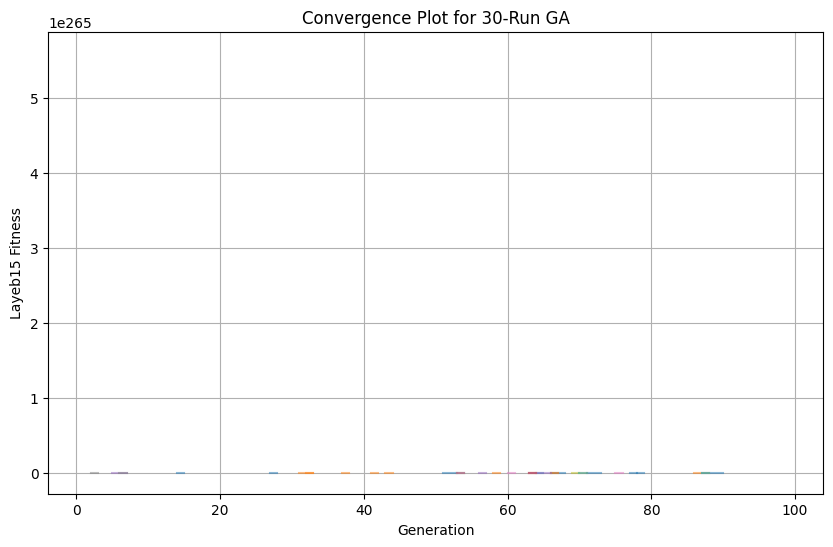

In [45]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb15 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [46]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(Layeb15, 
                        Layeb15_bounds, 
                        ineq_constraints=[],
                        eq_constraints=[],
                        n=2
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb15_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb15(solution) for solution in solutions]
mean = np.nanmean(fitness_best_sol)
std_dev = np.nanstd(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

C:\Users\herna\AppData\Local\Temp\ipykernel_42168\874342480.py:3: RuntimeWarning: invalid value encountered in sqrt
  term1 = 10 * np.sqrt(np.tanh(2 * abs(x[0]) - x[1]**2 - 1))
C:\Users\herna\AppData\Local\Temp\ipykernel_42168\874342480.py:4: RuntimeWarning: overflow encountered in exp
  term2 = abs(np.exp(x[0] * x[1] + x[1]) - 1)


Experiment 1, solution is [ 35.71391388 -34.1981026 ] and feasability is True
Experiment 2, solution is [ 99.34069667 -70.88455734] and feasability is True
Experiment 3, solution is [74.72923785 35.77123839] and feasability is True
Experiment 4, solution is [-81.25029701  70.97432137] and feasability is True
Experiment 5, solution is [-96.35562876 -23.23262218] and feasability is True
Experiment 6, solution is [-9.36221918 60.44611222] and feasability is True
Experiment 7, solution is [-81.57606122 -76.59584826] and feasability is True
Experiment 8, solution is [ -1.06202138 -44.27682584] and feasability is True
Experiment 9, solution is [18.57184179 -5.9814231 ] and feasability is True
Experiment 10, solution is [52.06425625 67.15503321] and feasability is True
Experiment 11, solution is [-30.34632855   7.6875248 ] and feasability is True
Experiment 12, solution is [-11.15203433 -18.73317326] and feasability is True
Experiment 13, solution is [ 25.68836476 -94.81094806] and feasabilit

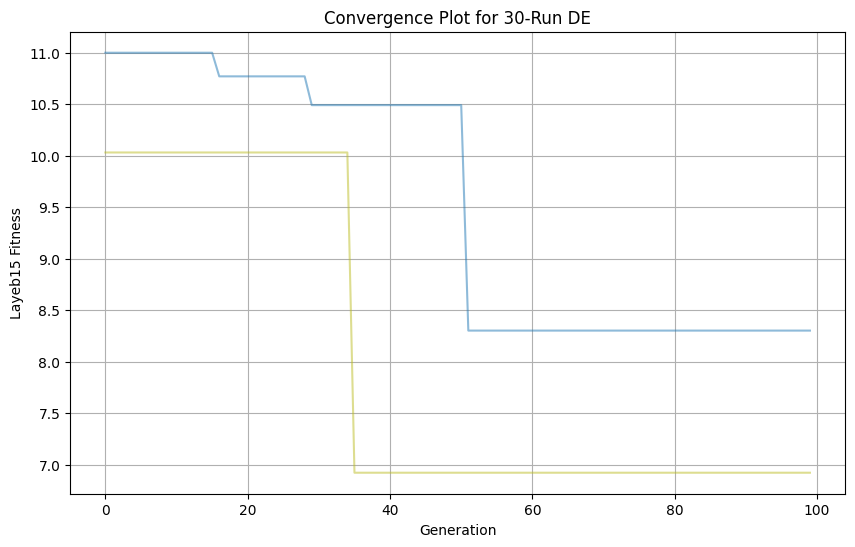

In [47]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb15 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [48]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = genetic_algorithm(Layeb18, 
                                      Layeb18_bounds, 
                                      2, 
                                      ineq_constraints=[],
                                      eq_constraints=[]                                      
                                    )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb18_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb18(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

ga_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [ 6.33541944 -9.73700086] and feasability is True
Experiment 2, solution is [ 6.93451047 -1.0547625 ] and feasability is True
Experiment 3, solution is [ 7.26979058 -1.01261121] and feasability is True
Experiment 4, solution is [0.98565906 7.50121497] and feasability is True
Experiment 5, solution is [-6.26178998  9.06978003] and feasability is True
Experiment 6, solution is [8.55916832 9.519927  ] and feasability is True
Experiment 7, solution is [-10.           3.69809862] and feasability is True
Experiment 8, solution is [-2.29974826  5.3959657 ] and feasability is True
Experiment 9, solution is [ 9.71329969 -2.79446395] and feasability is True
Experiment 10, solution is [4.80933659 5.64161778] and feasability is True
Experiment 11, solution is [8.62599575 0.85844607] and feasability is True
Experiment 12, solution is [-2.07100106  3.53130906] and feasability is True
Experiment 13, solution is [5.06684124 8.28327824] and feasability is True
Experiment 14, s

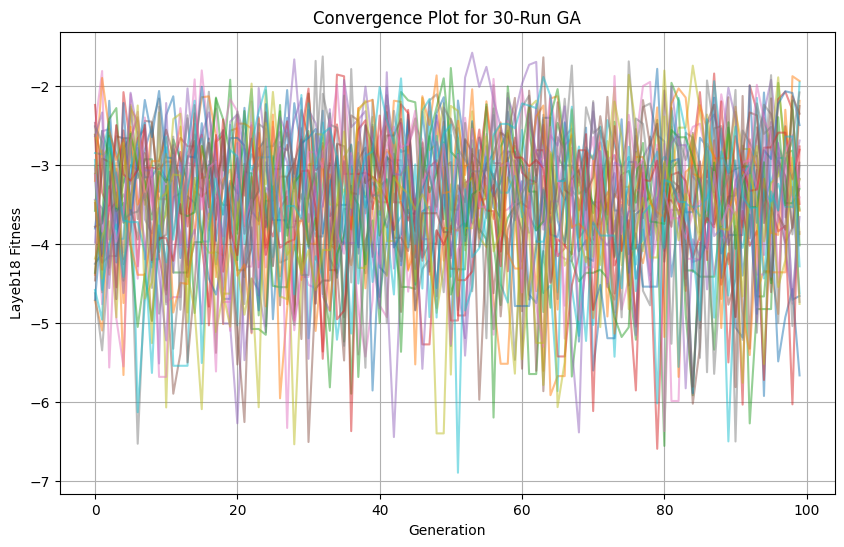

In [49]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb18 Fitness")
plt.title("Convergence Plot for 30-Run GA")
plt.grid(True)
plt.show()

In [50]:
solutions = []
fitness_per_gen = []
for i in range(30):
  fit_per_gen, sol = de(Layeb18, 
                        Layeb18_bounds, 
                        ineq_constraints=[],
                        eq_constraints=[],
                        n=2
                        )
  fitness_per_gen.append(fit_per_gen)
  solutions.append(sol)
  is_feasible = Layeb18_bounds_check(sol)
  print(f'Experiment {i + 1}, solution is {sol} and feasability is {is_feasible}')

fitness_best_sol = [Layeb18(solution) for solution in solutions]
mean = np.mean(fitness_best_sol)
std_dev = np.std(fitness_best_sol)

de_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

Experiment 1, solution is [4.26118139 5.21137409] and feasability is True
Experiment 2, solution is [1.75597328 1.40514721] and feasability is True
Experiment 3, solution is [ 1.57550143 -7.83052639] and feasability is True
Experiment 4, solution is [4.99781279 4.44326563] and feasability is True
Experiment 5, solution is [1.57457553 1.56702619] and feasability is True
Experiment 6, solution is [-1.684205830528386, -1.465023486309906] and feasability is True
Experiment 7, solution is [7.940067687201033, -5.282803600887324] and feasability is True
Experiment 8, solution is [ 5.41844582 -2.27685316] and feasability is True
Experiment 9, solution is [-1.5617775   4.73960167] and feasability is True
Experiment 10, solution is [-1.4509395746688027, 8.502769712667948] and feasability is True
Experiment 11, solution is [-7.85398163 -0.31415927] and feasability is True
Experiment 12, solution is [-7.85398158  4.71238901] and feasability is True
Experiment 13, solution is [-1.55667054  7.925251

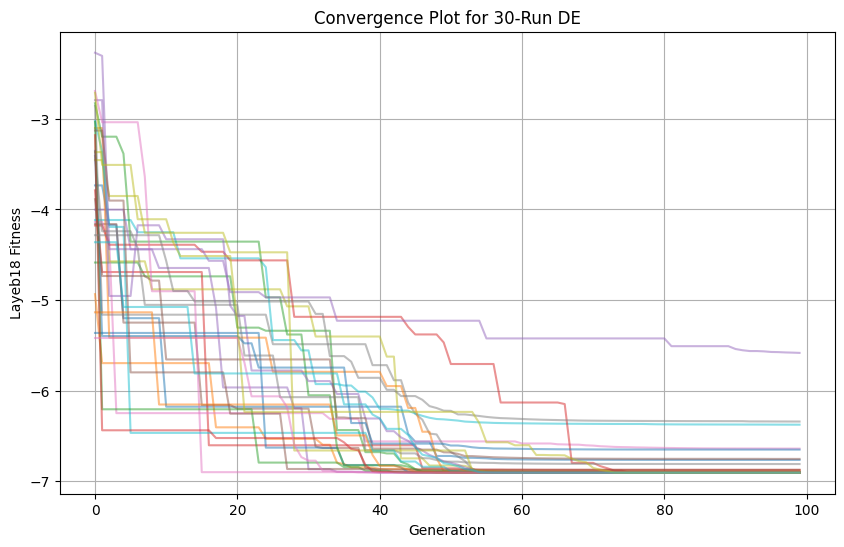

In [51]:
# Plot all runs in a single convergence plot
plt.figure(figsize=(10, 6))

for run in fitness_per_gen:
    plt.plot(run, alpha=0.5)  # Plot each run with a slight transparency

# Adding labels and title
plt.xlabel("Generation")
plt.ylabel("Layeb18 Fitness")
plt.title("Convergence Plot for 30-Run DE")
plt.grid(True)
plt.show()

In [52]:
class Particle:
    def __init__(self, objective_function):
        self.__obj_func_singleton = objective_function
        self.x = np.empty(objective_function.get_nvar())       
        self.velocity = np.empty(objective_function.get_nvar())
        self.objective_value = None
    
    def get_x(self):
        return self.x
    
    def set_x(self, x):
        self.x = np.array(x, copy=True)
    
    def get_x_at(self, i):
        return self.x[i]

    def set_x_at(self, value, i):
        self.x[i] = value

    def get_velocity(self):
        return self.velocity
    
    def set_velocity(self, velocity):
        self.velocity = np.array(velocity, copy=True)
    
    def get_velocity_at(self, i):
        return self.velocity[i]
    
    def set_velocity_at(self, value, i):
        self.velocity[i] = value
    
    def get_objective_value(self):
        return self.objective_value
    
    def set_objective_value(self, objective_value):
        self.objective_value = objective_value
    
    def evaluate_objective_function(self):
        self.objective_value = self.__obj_func_singleton.evaluate(self.x)
    
    def initialize_location(self, value=None):
        if value is None:
            self.x = np.empty(self.__obj_func_singleton.get_nvar())
            xmin = self.__obj_func_singleton.get_xmin()
            xmax = self.__obj_func_singleton.get_xmax()
            for i in range(self.__obj_func_singleton.get_nvar()):
                self.x[i] = xmin[i] + np.random.rand() * (xmax[i] - xmin[i])
            self.objective_value = self.__obj_func_singleton.evaluate(self.x)
        else:
            self.x = np.full(self.__obj_func_singleton.get_nvar(), np.infty)
            self.objective_value = value
    
class ParticleFactory:
    def __init__(self, obj_func_singleton):
        self.__obj_func_singleton = obj_func_singleton

    def create_particle(self):
        return Particle(self.__obj_func_singleton)

In [53]:
class Swarm:
    def __init__(self, swarm_size, particle_factory):
        self.swarm_size = swarm_size
        self.particle_factory = particle_factory
        self.swarm = np.empty(swarm_size, dtype=Particle)

    def get_swarm_size(self):
        return self.swarm_size  
    
    def add_particle_at(self, index, particle):
        self.swarm[index] = particle
    
    def get_particle_at(self, index):
        return self.swarm[index]
    
    def initialize_lbest_swarm(self):
        for i in range(self.swarm_size):
            particle = self.particle_factory.create_particle()
            particle.initialize_location(np.infty)
            self.add_particle_at(i, particle)
    
    def initialize_swarm(self):
        for i in range(self.swarm_size):
            particle = self.particle_factory.create_particle()
            particle.initialize_location()
            self.add_particle_at(i, particle)

In [54]:
class PSO:
    def __init__(self, params, obj_func):
        self.params = params
        self.obj_func = obj_func
        self.particle_factory = ParticleFactory(obj_func)       
        self.swarm = Swarm(params.get_swarm_size(), self.particle_factory)
        self.lbest = Swarm(params.get_swarm_size(), self.particle_factory)
        self.c1 = self.params.get_c1()
        self.c2 = self.params.get_c2()
        self.w = self.params.get_w()
    
    def run(self, execution, report):
        self.swarm.initialize_swarm()
        self.lbest.initialize_lbest_swarm()
        gbest = self.particle_factory.create_particle()
        gbest.initialize_location(np.infty)
        t = 0
        delta = np.random.random()
        while t < self.params.get_Gmax():
            for i in range(self.swarm.get_swarm_size()):
                particle = self.swarm.get_particle_at(i)
                particle_lbest = self.lbest.get_particle_at(i)
                # Set the personal best position
                if particle.get_objective_value() < particle_lbest.get_objective_value():
                    particle_lbest.set_x(particle.get_x())
                    particle_lbest.set_objective_value(particle.get_objective_value())
                    
                # Update the gBest position
                if particle_lbest.get_objective_value() < gbest.get_objective_value():
                    gbest.set_x(particle_lbest.get_x())
                    gbest.set_objective_value(particle_lbest.get_objective_value())
                    
            # Random numbers for the calculation of the velocity
            r1 = np.random.rand(self.obj_func.get_nvar(), 1)
            r2 = np.random.rand(self.obj_func.get_nvar(), 1)

            # For each particle, update its velocity and position
            for i in range(self.swarm.get_swarm_size()):
                particle = self.swarm.get_particle_at(i)
                lbest = self.lbest.get_particle_at(i)
                for j in range(self.obj_func.get_nvar()):
                    # Update velocity and position of each particle
                    max_velocity = delta*(self.swarm.get_particle_at(-1).get_x_at(j) - self.swarm.get_particle_at(0).get_x_at(j))
                    velocity = particle.get_velocity_at(j) + self.c1*r1[j][0]*(lbest.get_x_at(j) - particle.get_x_at(j)) + self.c2*r2[j][0]*(gbest.get_x_at(j) - particle.get_x_at(j))
                    if velocity >= max_velocity:
                        velocity = max_velocity
                    particle.set_velocity_at(velocity, j)

                    value = particle.get_x_at(j) + velocity
                    particle.set_x_at(value, j) # value is the new position for the j-th component of the particle
                particle.evaluate_objective_function() # Calculate the objective value based on the new position of the particle
            report.add_best_individual_at_generation(t, execution, gbest) # Do not modify!
            t = t + 1
        return gbest

In [55]:
class Parameters:
    def __init__(self, params_file):
        file = open(params_file, "rt")
        for line in file.readlines():
            fragments = line.split("=")
            if fragments[0] == "swarm_size":
                self.swarm_size = int(fragments[1])
            elif fragments[0] == "c1":
                self.c1 = float(fragments[1])
            elif fragments[0] == "c2":
                self.c2 = float(fragments[1])
            elif fragments[0] == "inertia_factor":
                self.w = float(fragments[1])
            elif fragments[0] == "nvar":
                self.nvar = int(fragments[1])
            elif fragments[0] == "Gmax":
                self.Gmax = int(fragments[1])    

    def get_swarm_size(self):
        return self.swarm_size

    def get_c1(self):
        return self.c1

    def get_c2(self):
        return self.c2
    
    def get_w(self):
        return self.w

    def get_nvar(self):
        return self.nvar 

    def get_Gmax(self):
        return self.Gmax

In [56]:
import copy

class Report:
    def __init__(self, number_executions, Gmax):
        self.number_executions = number_executions
        self.number_generations = Gmax
        self.final_individual_per_execution = np.empty(number_executions, dtype=Particle)
        self.best_individual_per_generation = np.empty((number_executions, Gmax), dtype=Particle)
    
    # Add the best individual obtained during the evolutionary process at a given execution.
    def add_final_individual_from_execution(self, execution, individual):
        self.final_individual_per_execution[execution] = copy.copy(individual)

    # Return the best individual from a given execution
    def get_final_individual_from_execution(self, execution):
        return self.final_individual_per_execution[execution]

    # Add the best individual from a generation to the list corresponding to the current execution
    def add_best_individual_at_generation(self, generation, execution, individual):
        self.best_individual_per_generation[execution][generation] = copy.copy(individual)

    # Return the list of best individuals obtained at each generation at a given execution
    def get_best_individuals_from_generations(self, execution):
        return self.best_individual_per_generation[execution]
    
    def print_report(self, filename="output/optimization.txt"):
        file = open(filename, "wt")
        for individual in self.final_individual_per_execution:
            file.write("{0}\n".format(individual.get_objective_value()))
        file.close()

In [57]:
class Plot:
    def __init__(self):
        self.fig = None
        self.ax = None
        self.line = None
        self.annot = None
        self.z_labels = None

    def analysis_plot(self, obj_function, best_individuals, execution):
        # Preparing data
        xmin = obj_function.get_xmin()
        xmax = obj_function.get_xmax()
        x = np.linspace(xmin[0], xmax[0], 1000)
        y = np.linspace(xmin[1], xmax[1], 1000)
        Z = np.empty((x.shape[0], y.shape[0]))
        for i in range(x.shape[0]):
            for j in range(y.shape[0]):
                aux = np.array([x[i], y[j]])
                Z[i, j]  = obj_function.evaluate(aux)
        X, Y = np.meshgrid(x, y)
        # Initialize figure   
        plt.rcParams.update({'font.size': 12})
        
        self.fig = plt.figure(figsize=(20, 10))
        self.fig.suptitle("{0} - Execution {1}".format(obj_function.get_name(), execution))
        # Plot 3D contour
        axis1 = self.fig.add_subplot(1,3,1, projection='3d')
        axis1.plot_surface(X, Y, Z, cmap='plasma')
        axis1.set_xlabel("$x_1$")
        axis1.set_ylabel("$x_2$")
        axis1.set_zlabel("$f(x_1, x_2)$")
        axis1.title.set_text('Fitness landscape')
        # Plot 2D contour  
        self.ax = self.fig.add_subplot(1,3,2)
        self.ax.contourf(X, Y, Z, 20, cmap='plasma')
        self.ax.set_xlabel("$x_1$")
        self.ax.set_ylabel("$x_2$")  
        self.ax.title.set_text('Contour plot and sequence of points')
        self.ax.set_aspect('equal', adjustable='box')
        self.annot = self.ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
        self.annot.set_visible(False)

        x1 = np.empty(len(best_individuals))
        x2 = np.empty(len(best_individuals))
        self.z_labels = np.empty(len(best_individuals))
        # Add best invidual from each generation to the contour plot
        for i in range(len(best_individuals)):
            decision_vector = best_individuals[i].get_x()
            x1[i] = decision_vector[0]
            x2[i] = decision_vector[1]
            self.z_labels[i] = best_individuals[i].get_objective_value()            
        self.line, = plt.plot(x1, x2, marker='o', color="white")
        self.fig.canvas.mpl_connect("motion_notify_event", self.hover)
        # Convergence plot
        axis3 = self.fig.add_subplot(1,3,3)
        axis3.plot(np.arange(1, len(best_individuals) + 1, 1), self.z_labels)
        axis3.scatter(np.arange(1, len(best_individuals) + 1, 1), self.z_labels)
        axis3.title.set_text("Convergence plot")
        axis3.set_xlabel("Generation")
        axis3.set_ylabel("Objective value")
        axis3.set_xscale('log')
        plt.subplots_adjust(wspace=0.4)
        plt.show()


    def update_annot(self, ind):
        x,y = self.line.get_data()
        self.annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
        text = "$f(t={}) = {}$".format(ind["ind"][0], self.z_labels[ind["ind"][0]])
        self.annot.set_text(text)
        self.annot.get_bbox_patch().set_alpha(0.4)


    def hover(self, event):
        vis = self.annot.get_visible()
        if event.inaxes == self.ax:
            cont, ind = self.line.contains(event)
            if cont:
                self.update_annot(ind)
                self.annot.set_visible(True)
                self.fig.canvas.draw_idle()
            else:
                if vis:
                    self.annot.set_visible(False)
                    self.fig.canvas.draw_idle()

In [58]:
from abc import ABCMeta, abstractmethod
class ObjectiveFunction(metaclass=ABCMeta):
    def __init__(self, nvar):
        self.nvar = nvar
        self.xmin = np.empty(nvar)
        self.xmax = np.empty(nvar)
        self.set_xmin()
        self.set_xmax()
        
    @abstractmethod
    def evaluate(self, x):
        pass

    @abstractmethod
    def set_xmin(self):
        pass
    
    @abstractmethod
    def set_xmax(self):
        pass

    @abstractmethod
    def get_name(self):
        pass

    def get_nvar(self):
        return self.nvar

    def get_xmin(self):
        return self.xmin

    def get_xmin_at(self, index):
        return self.xmin[index]
    
    def get_xmax(self):
        return self.xmax
    
    def get_xmax_at(self, index):
        return self.xmax[index]

class Layeb05(ObjectiveFunction):        
    def evaluate(self, x):
        # Assuming x has exactly 2 elements: x1 and x2
        term1 = np.log(abs(np.sin(x[0] - np.pi / 2)) + abs(np.cos(x[1] - np.pi)) + 0.001)
        term2 = abs(np.cos(2 * x[0] - x[1] + np.pi / 2)) + 1
        result = term1 / term2
        return result
    
    def set_xmin(self):
        for i in range(self.nvar):
            self.xmin[i] = -5.0

    def set_xmax(self):
        for i in range(self.nvar):
            self.xmax[i] = 5.0
    
    def get_name(self):
        return Layeb05.__name__
    
class Layeb10(ObjectiveFunction):        
    def evaluate(self, x):
        # Assuming x has exactly 2 elements: x1 and x2
        term1 = (np.log(x[0]**2 + x[1]**2 + 0.5))**2
        term2 = abs(100 * np.sin(x[0] - x[1]))
        result = term1 + term2
        return result
    
    def set_xmin(self):
        for i in range(self.nvar):
            self.xmin[i] = -5.0

    def set_xmax(self):
        for i in range(self.nvar):
            self.xmax[i] = 5.0
    
    def get_name(self):
        return Layeb10.__name__
    
class Layeb15(ObjectiveFunction):        
    def evaluate(self, x):
        # Assuming x has exactly 2 elements: x1 and x2
        term1 = 10 * np.sqrt(np.tanh(2 * abs(x[0]) - x[1]**2 - 1))
        term2 = abs(np.exp(x[0] * x[1] + x[1]) - 1)
        result = term1 + term2
        return result
    
    def set_xmin(self):
        for i in range(self.nvar):
            self.xmin[i] = -5.0

    def set_xmax(self):
        for i in range(self.nvar):
            self.xmax[i] = 5.0
    
    def get_name(self):
        return Layeb15.__name__
    
class Layeb18(ObjectiveFunction):        
    def evaluate(self, x):
        # Assuming x has exactly 2 elements: x1 and x2
        term1 = np.log(abs(np.cos(2 * x[0] * x[1] / np.pi)) + 0.001)
        term2 = abs(np.sin(x[0] + x[1]) * np.cos(x[0])) + 1
        result = term1 / term2
        return result
    
    def set_xmin(self):
        for i in range(self.nvar):
            self.xmin[i] = -5.0

    def set_xmax(self):
        for i in range(self.nvar):
            self.xmax[i] = 5.0
    
    def get_name(self):
        return Layeb18.__name__

class FunctionFactory:
    function_dictionary = {Layeb05.__name__: Layeb05,
                            Layeb10.__name__: Layeb10,
                            Layeb15.__name__: Layeb15,
                            Layeb18.__name__: Layeb18}
    @classmethod
    def select_function(cls, function_name, nvar):
        return cls.function_dictionary[function_name](nvar)

In [59]:
class Experiment:
    def __init__(self, params_file, function_name, number_executions):
        self.parameters = Parameters(params_file)     
        self.obj_func = FunctionFactory.select_function(function_name, self.parameters.get_nvar())
        self.pso = PSO(self.parameters, self.obj_func)                        
        self.number_executions = number_executions
        self.report = Report(number_executions, self.parameters.get_Gmax())
        self.plot = Plot()
    
    def execute_experiment(self, feasibilifty_func, output_file=None):
        for execution in range(self.number_executions):
            individual = self.pso.run(execution, self.report)
            self.report.add_final_individual_from_execution(execution, individual)
            is_feasible = feasibilifty_func(self.report.get_final_individual_from_execution(execution).get_x())
            print("Execution", execution + 1, " fitness=", individual.get_objective_value(), 'and feasibility is', is_feasible)
            self.plot.analysis_plot(self.obj_func, self.report.get_best_individuals_from_generations(execution), execution + 1)
        if output_file == None:
            self.report.print_report()
        else:
            self.report.print_report(output_file)
        pass

In [60]:
pso_best_solutions = []

Execution 1  fitness= -1.646279418064103 and feasibility is True


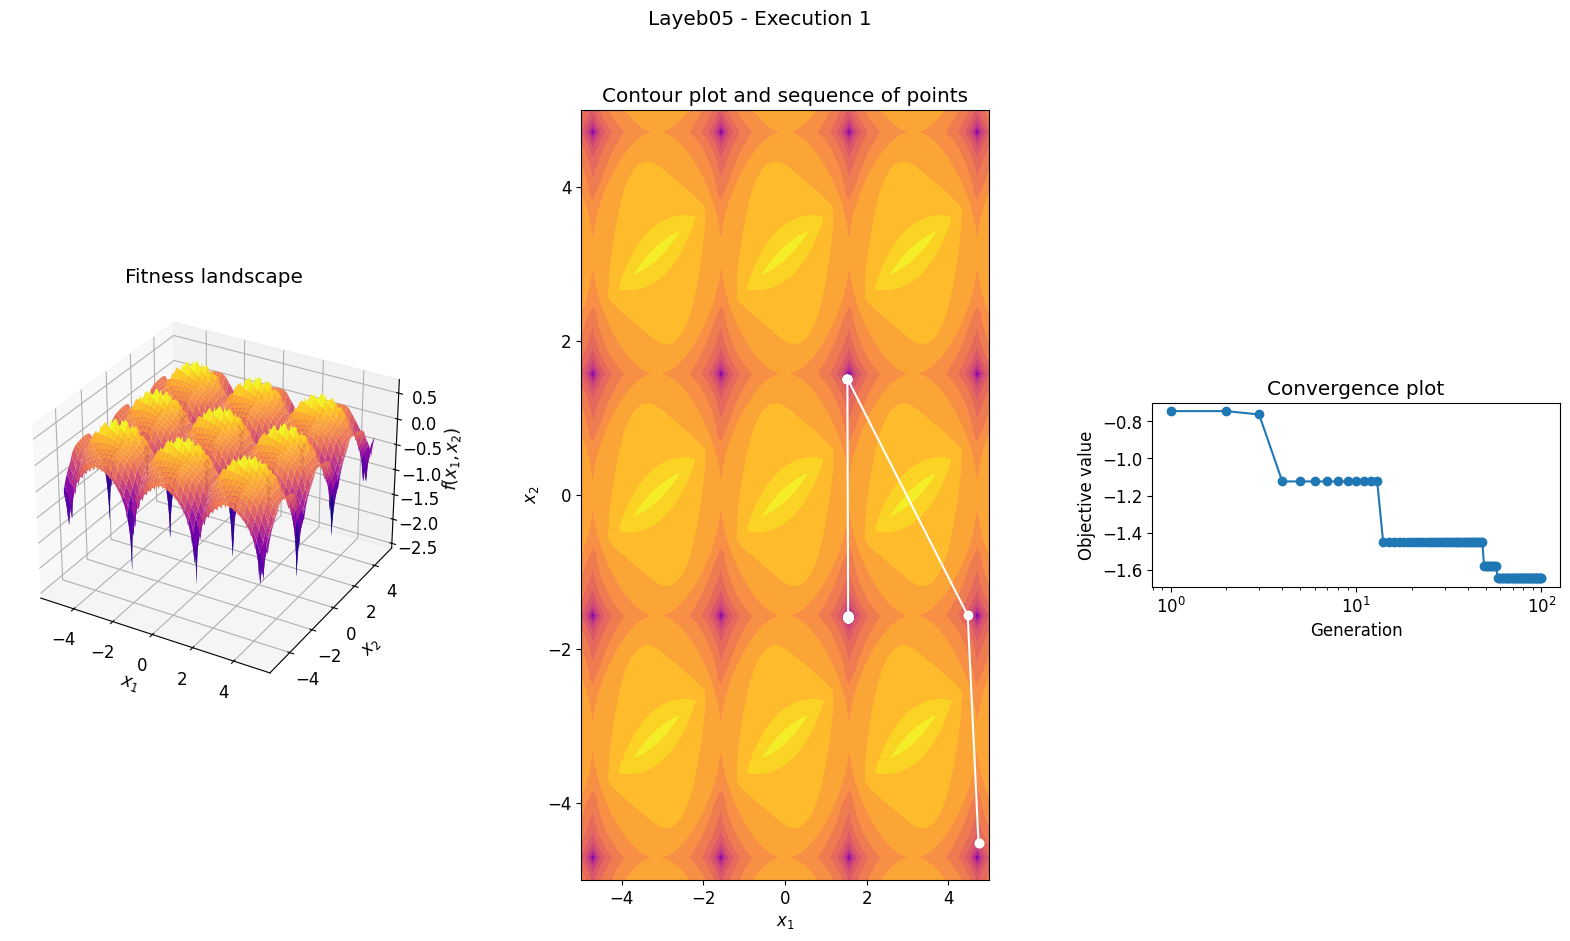

Execution 2  fitness= -2.1079201687483526 and feasibility is False


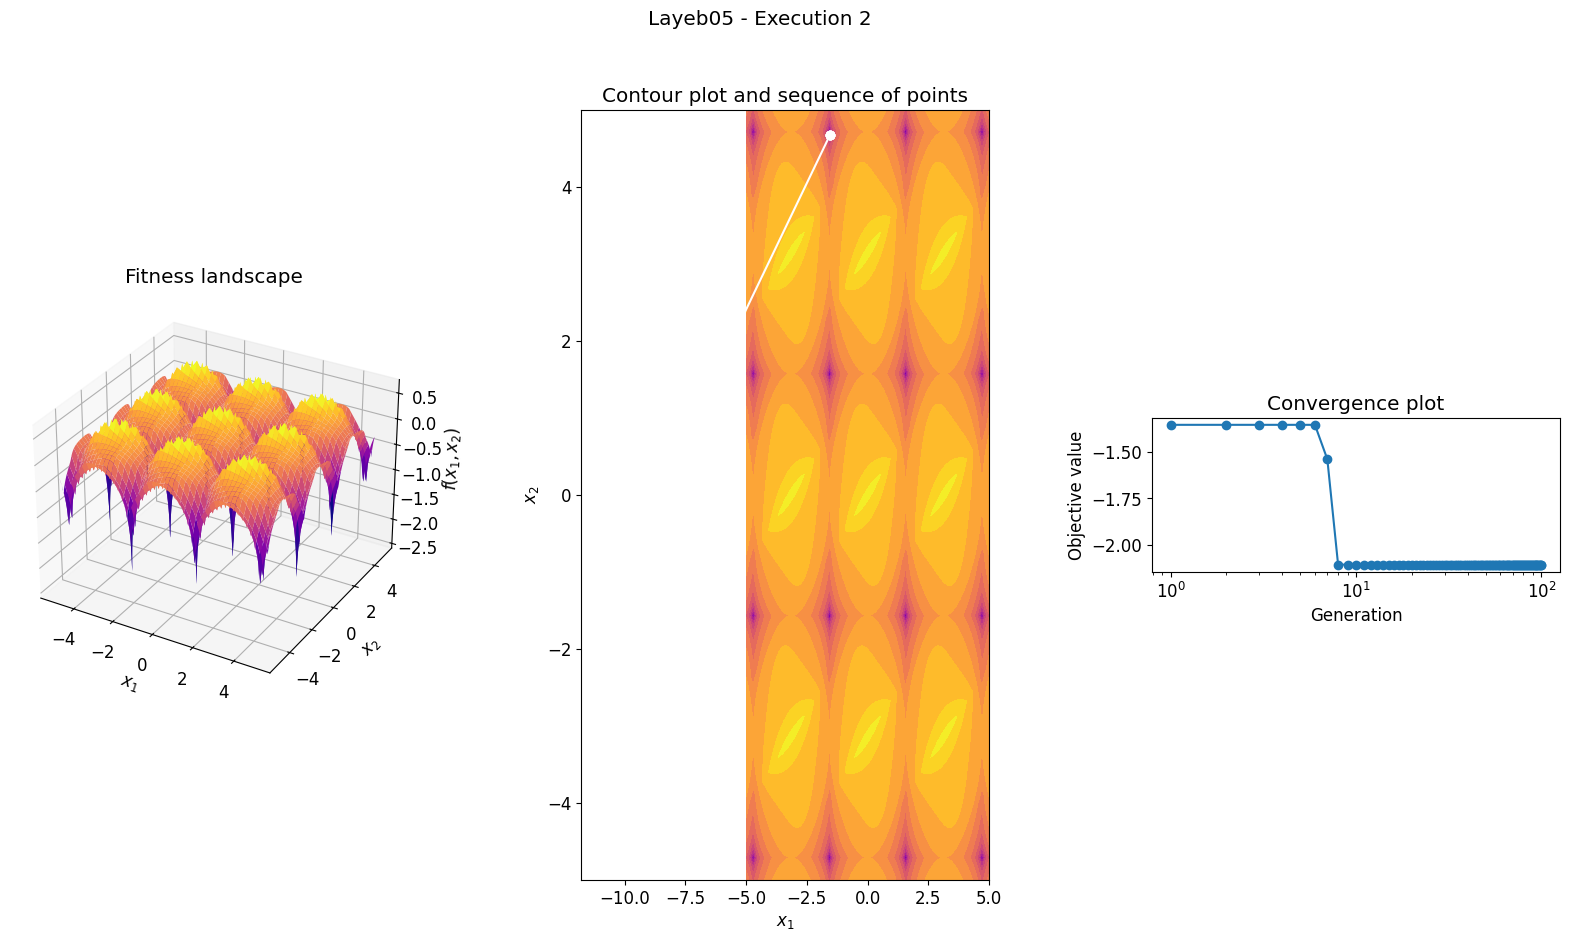

Execution 3  fitness= -1.7160529268829707 and feasibility is False


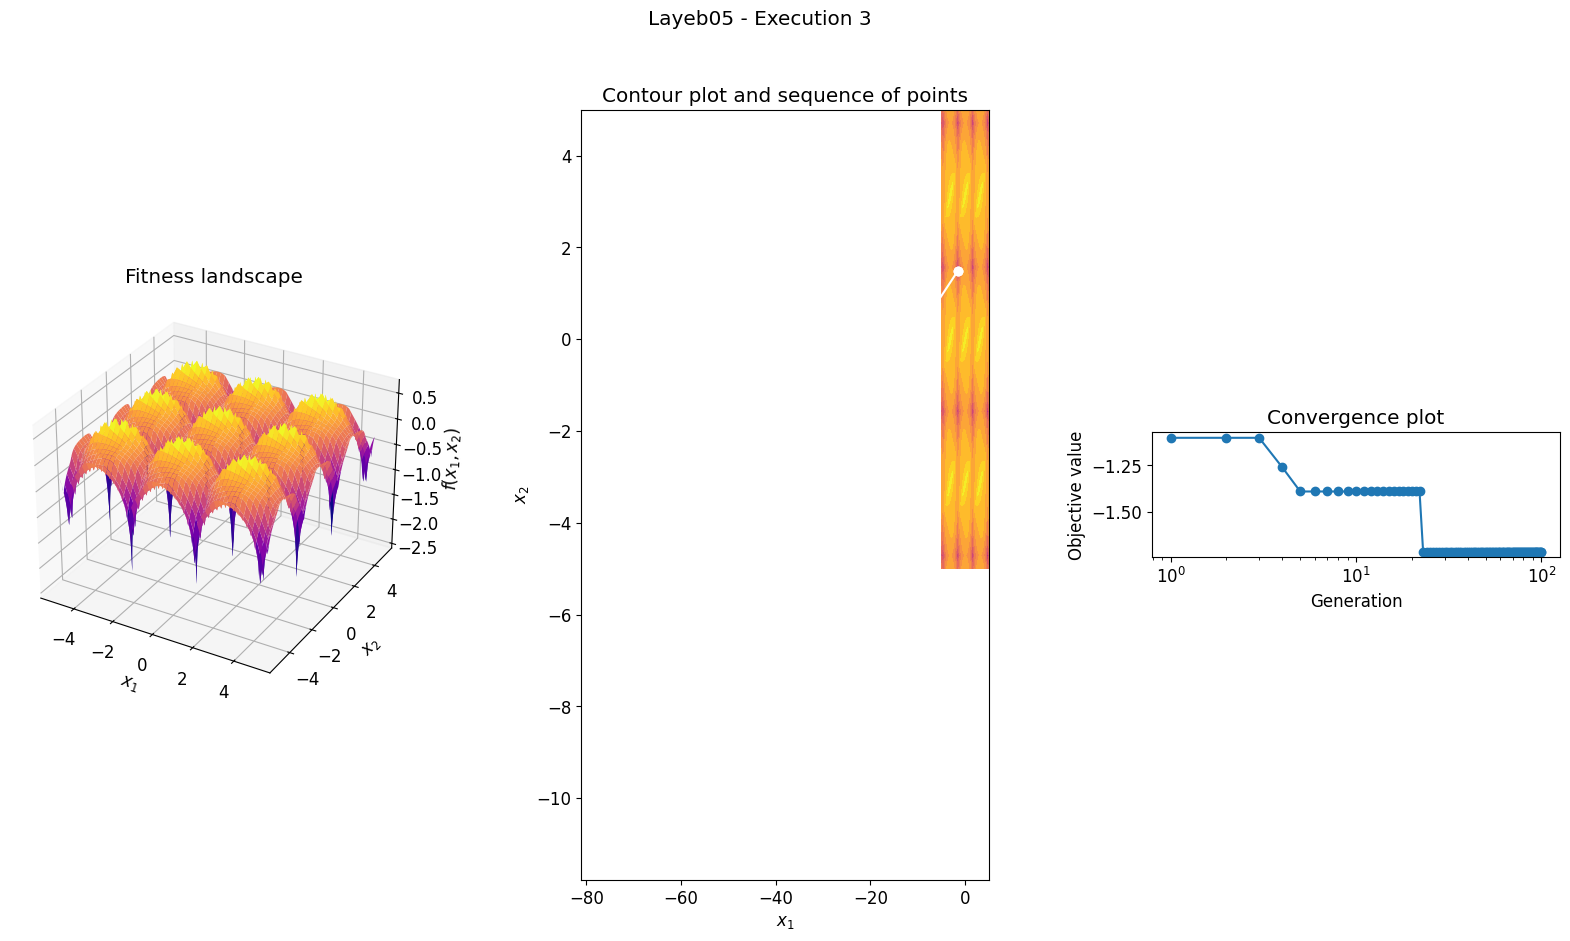

Execution 4  fitness= -1.6699563520333656 and feasibility is True


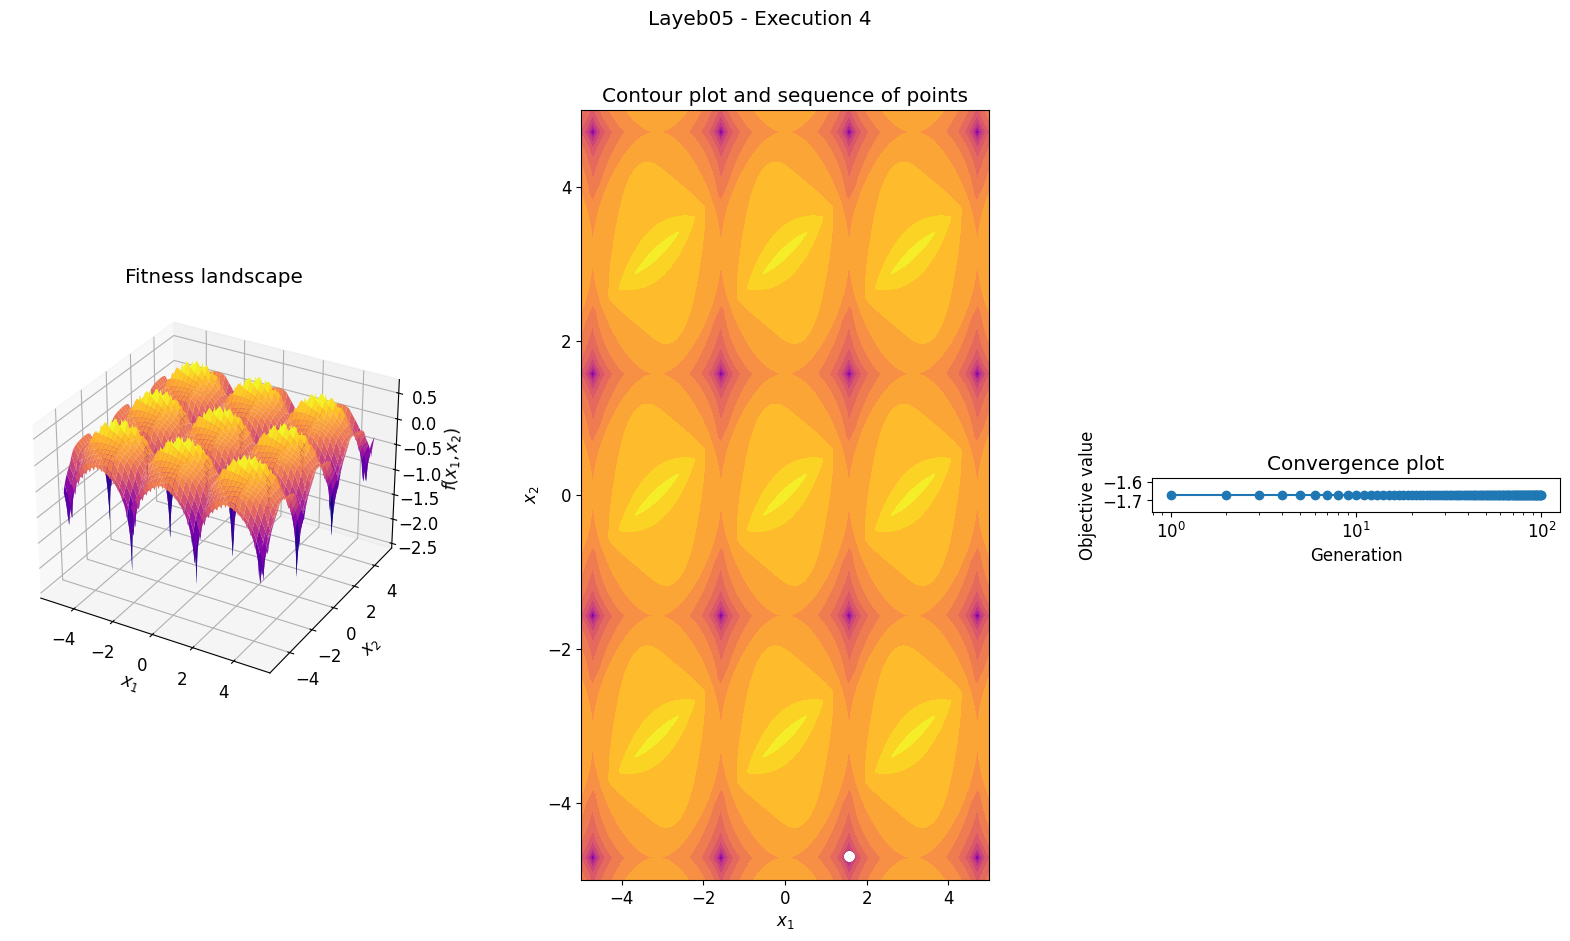

Execution 5  fitness= -1.7101044529303508 and feasibility is False


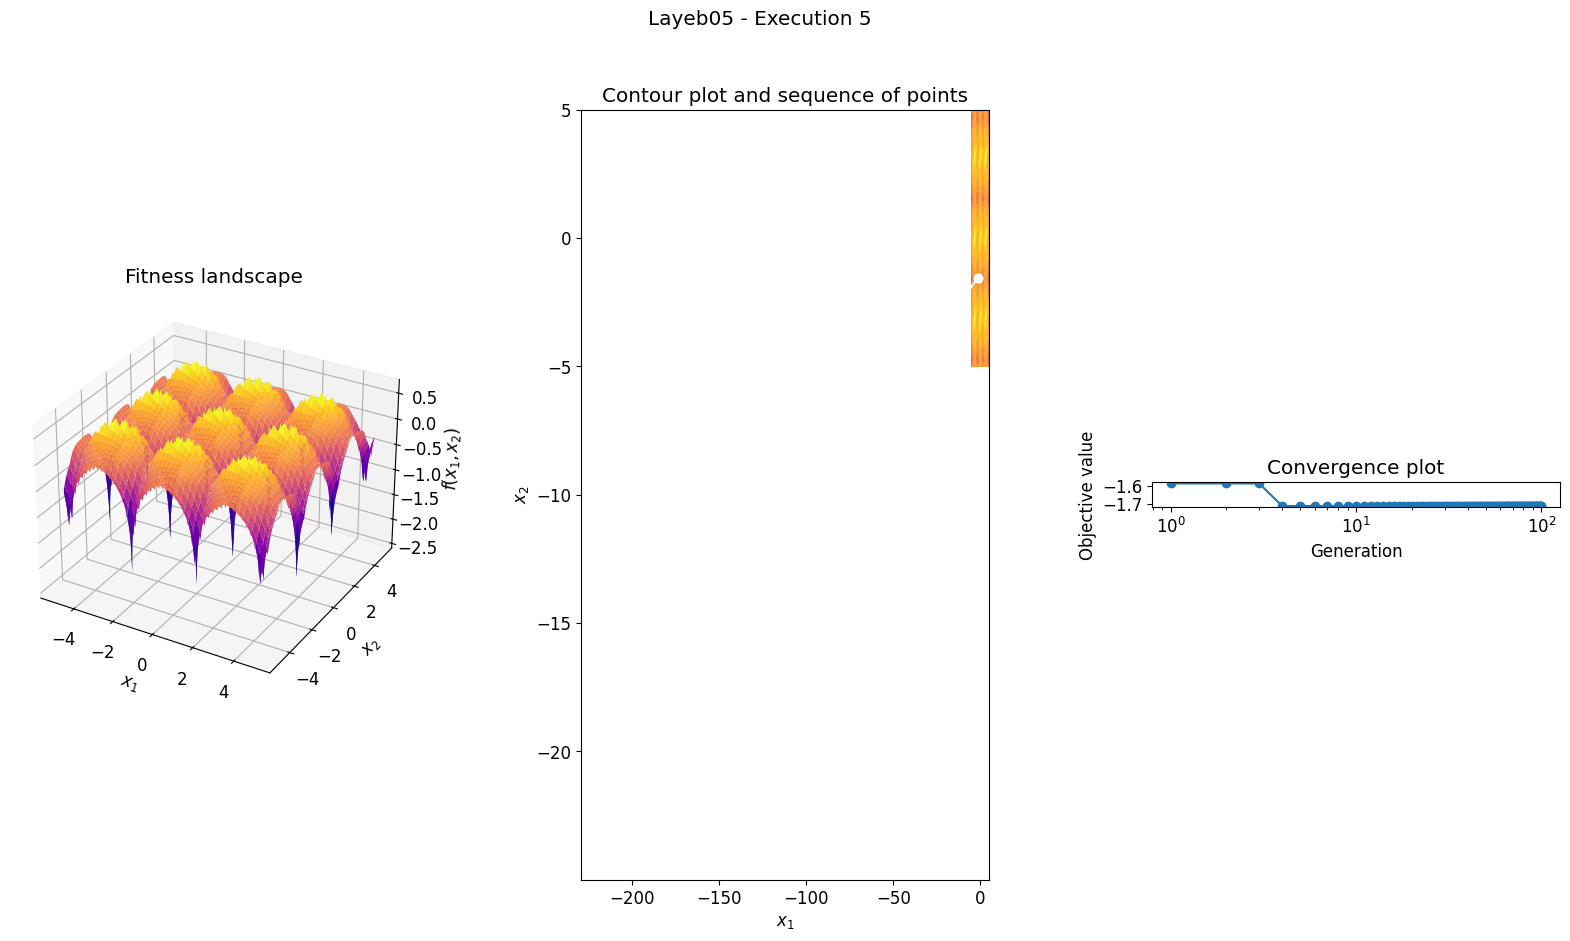

Execution 6  fitness= -1.6154298255191377 and feasibility is False


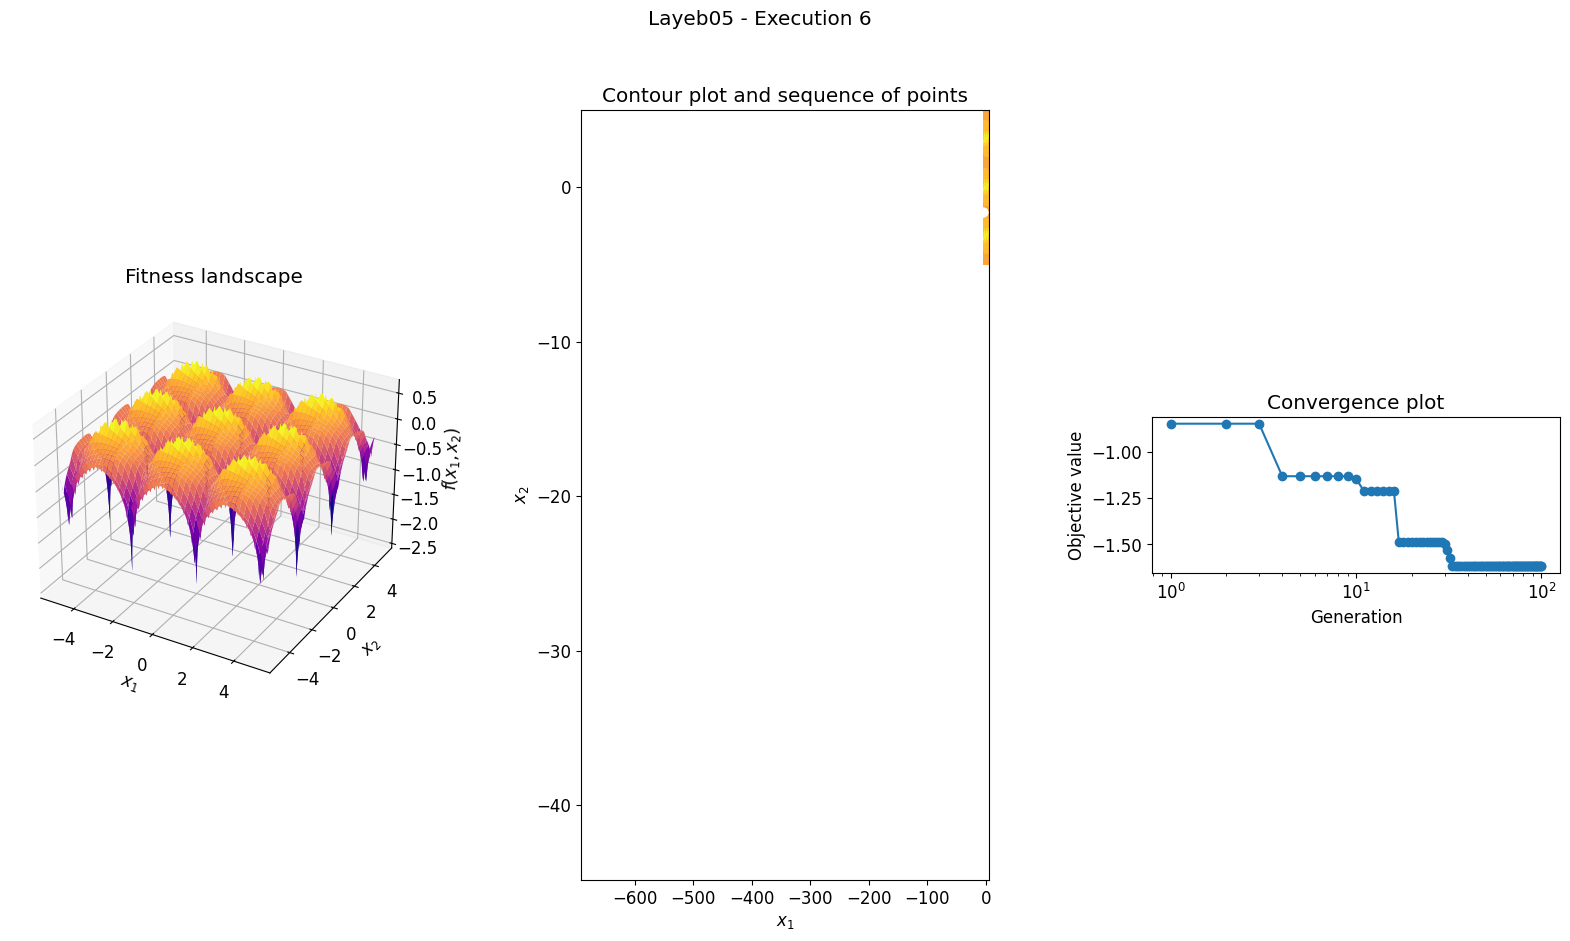

Execution 7  fitness= -1.810054336476173 and feasibility is False


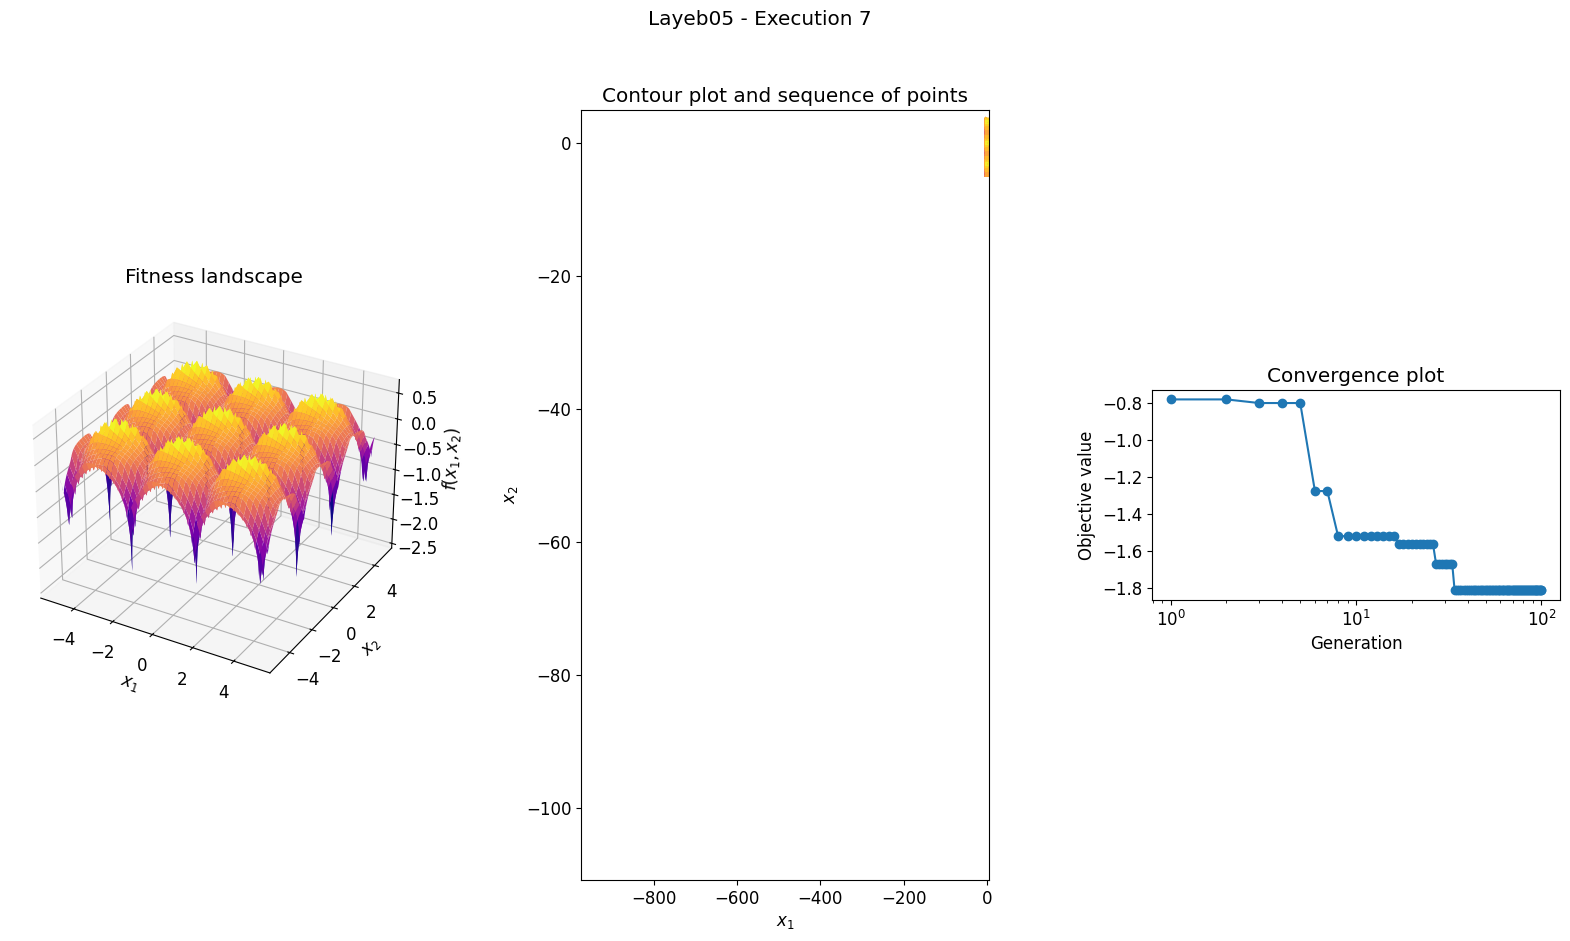

Execution 8  fitness= -2.322234182475969 and feasibility is False


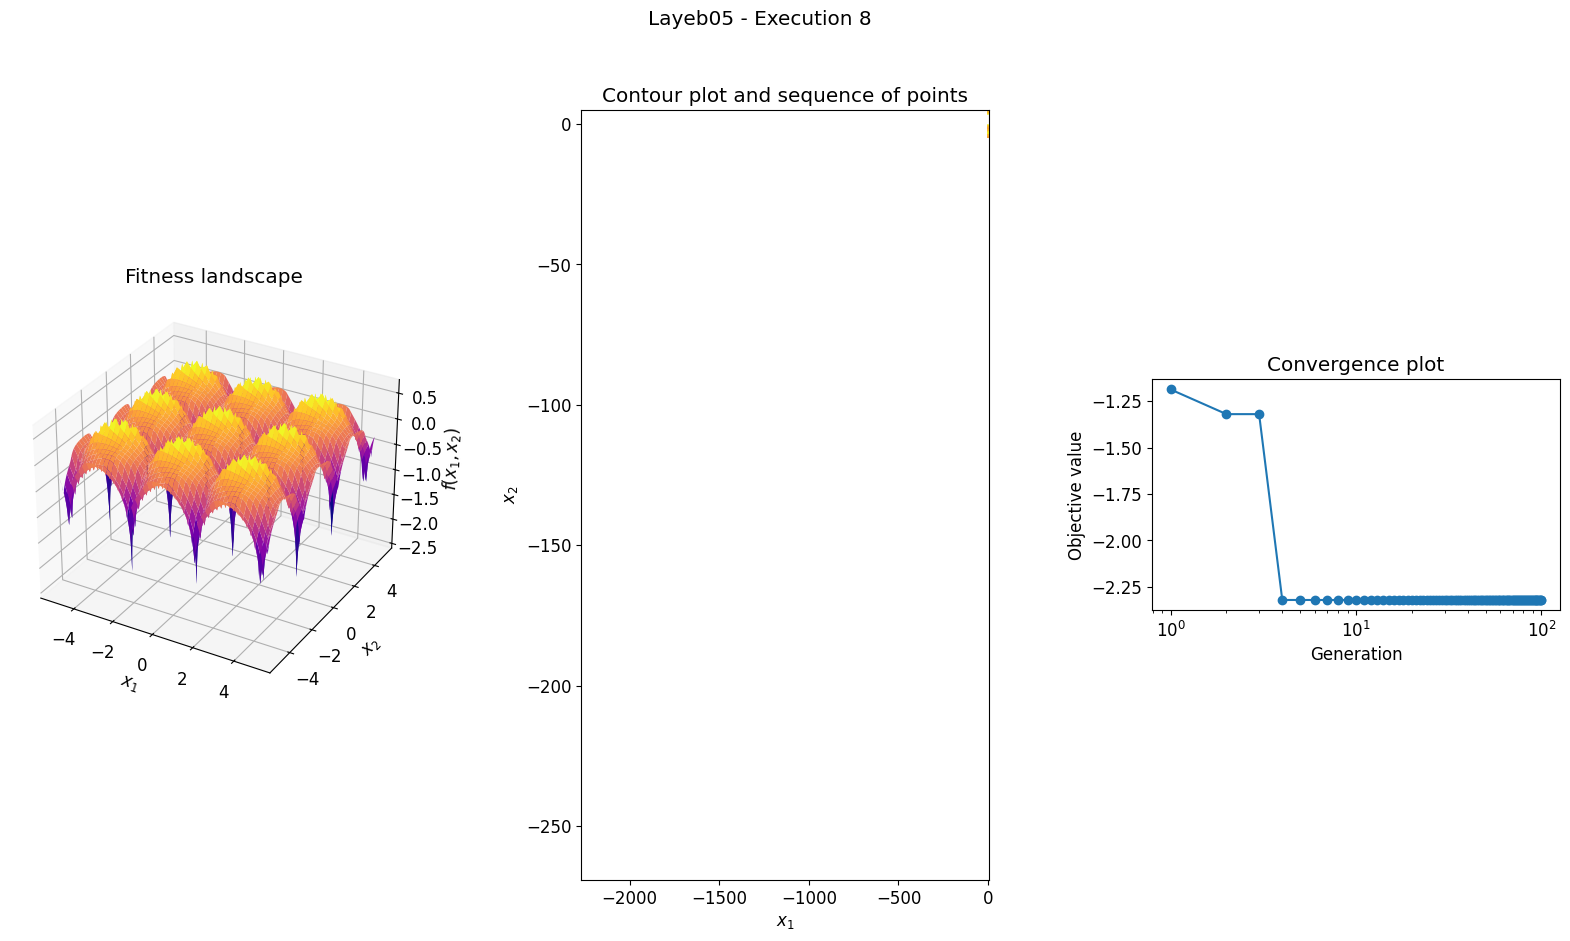

Execution 9  fitness= -1.7829149503221484 and feasibility is False


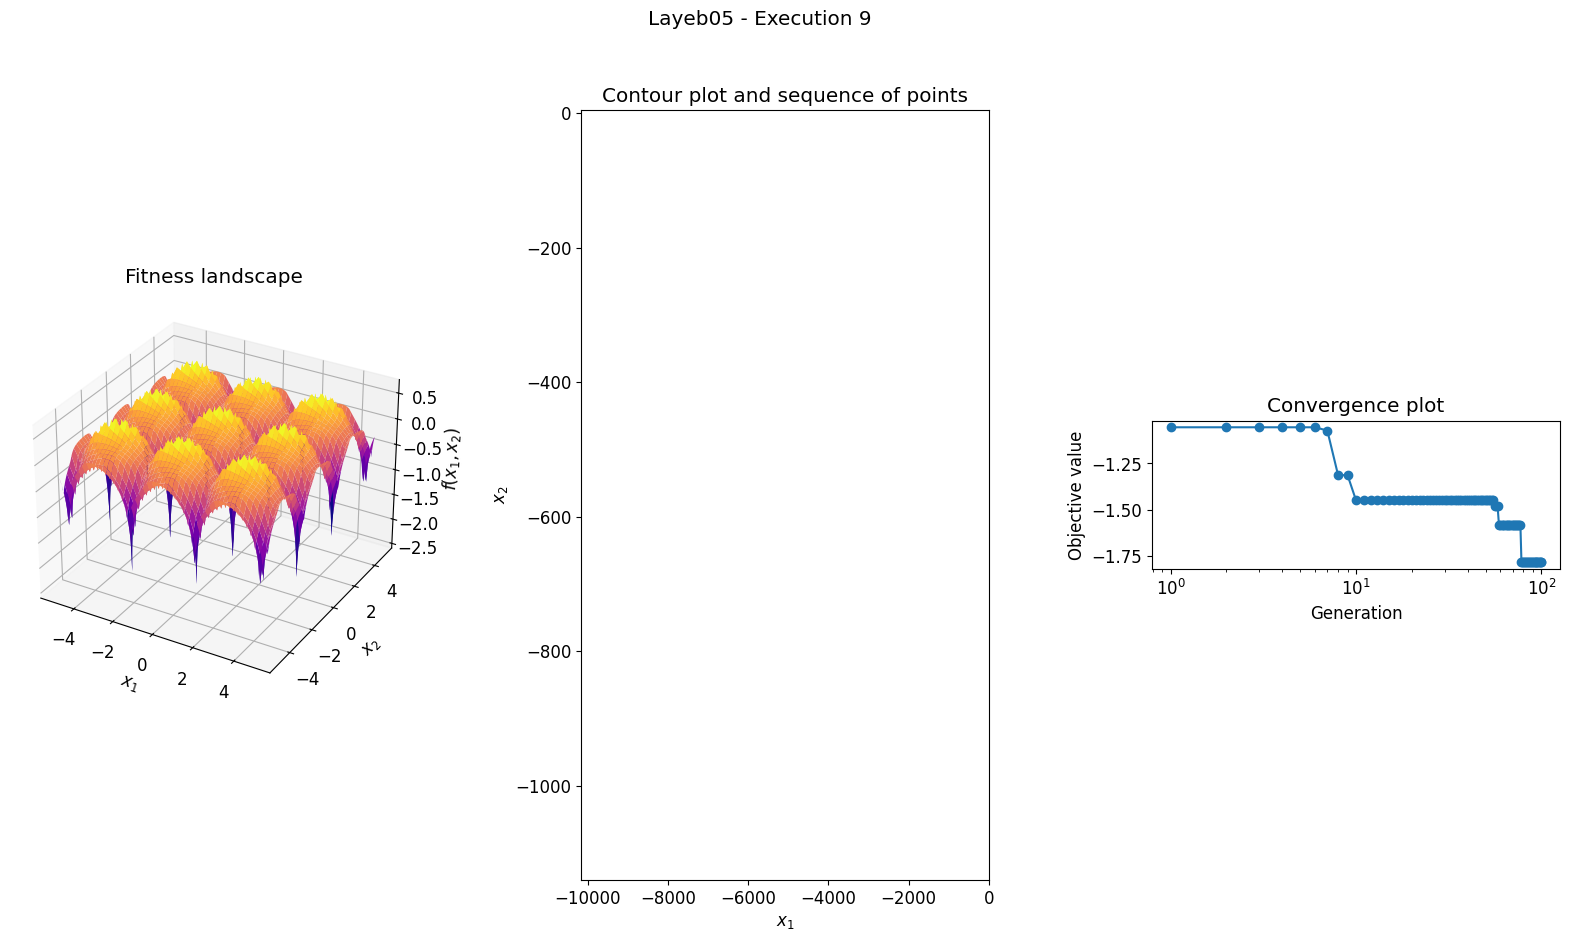

Execution 10  fitness= -1.7551090669321658 and feasibility is False


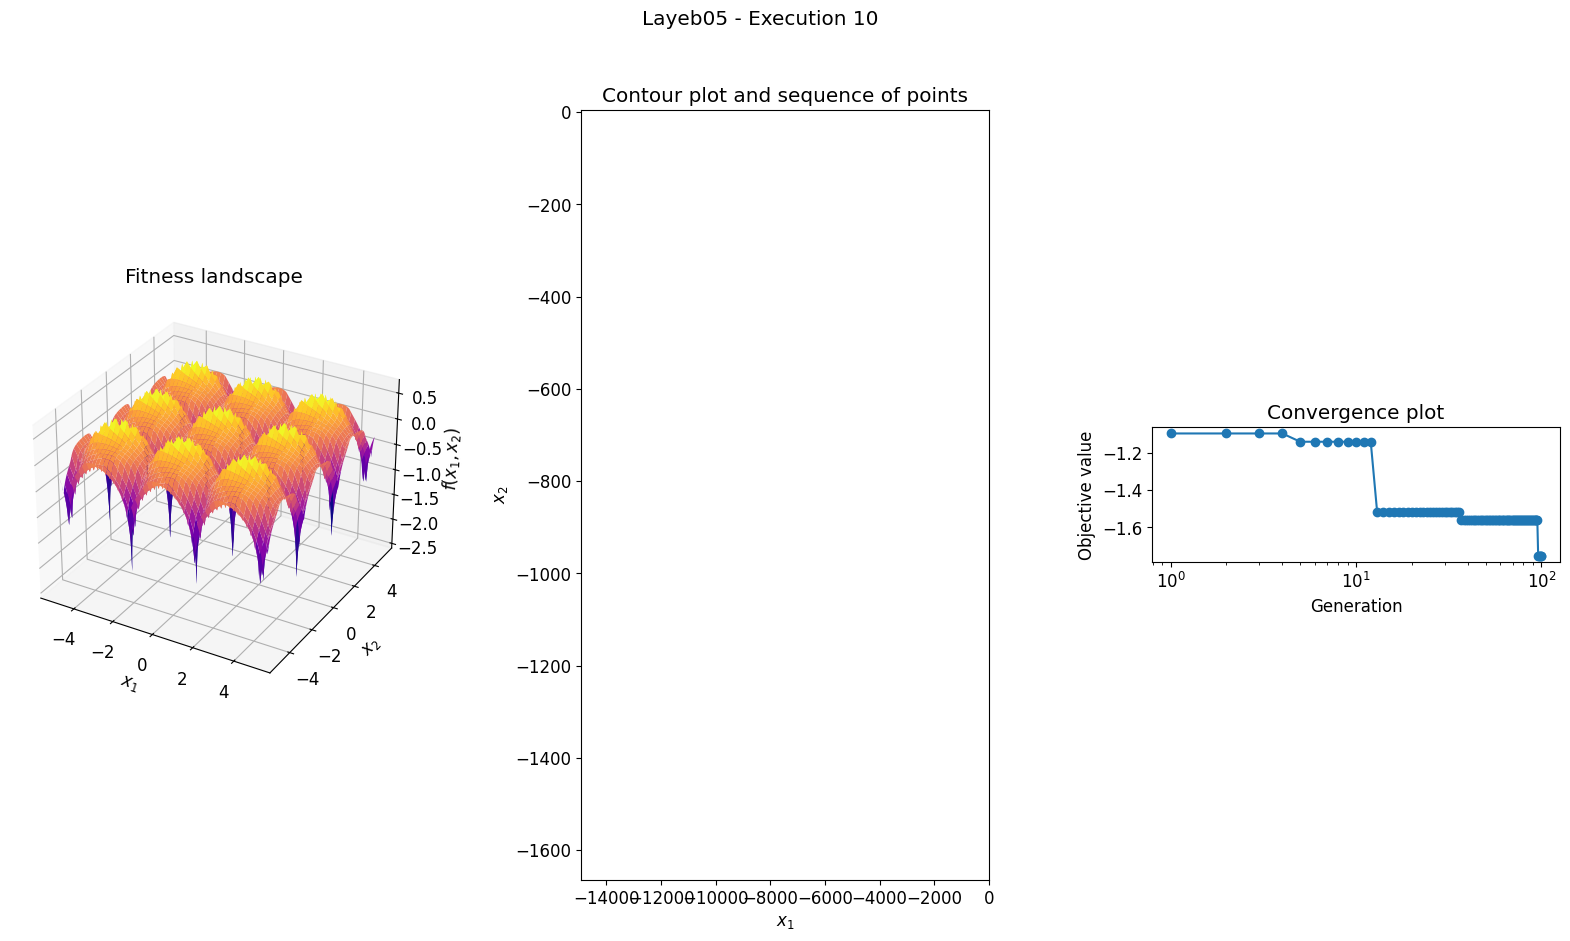

Execution 11  fitness= -2.3473503252393497 and feasibility is False


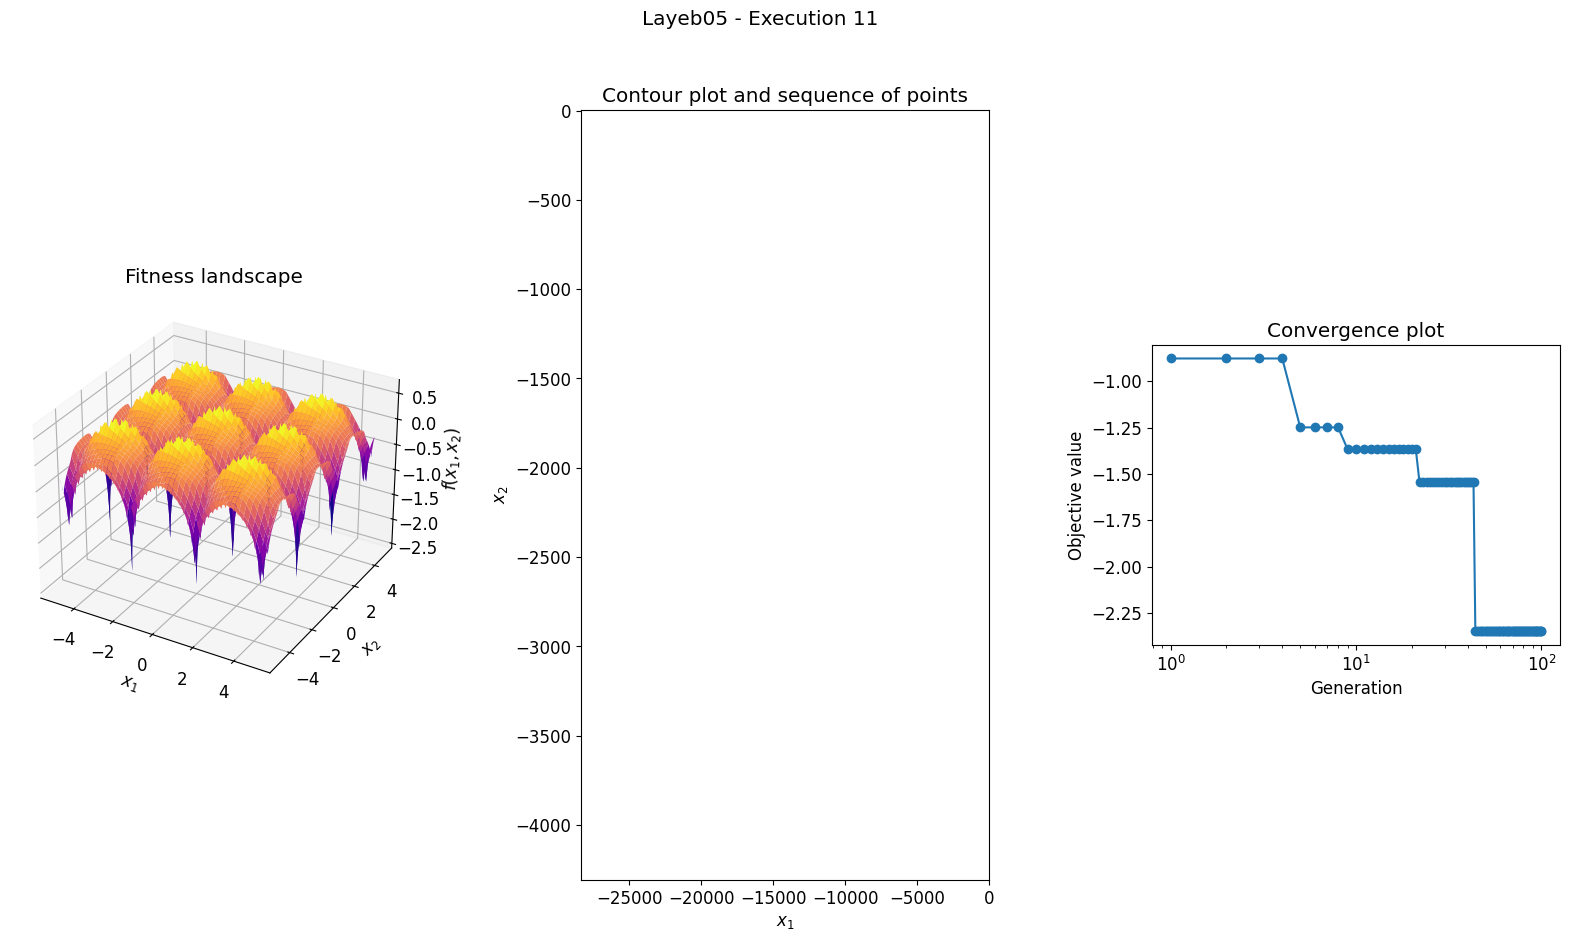

Execution 12  fitness= -2.372172872120966 and feasibility is False


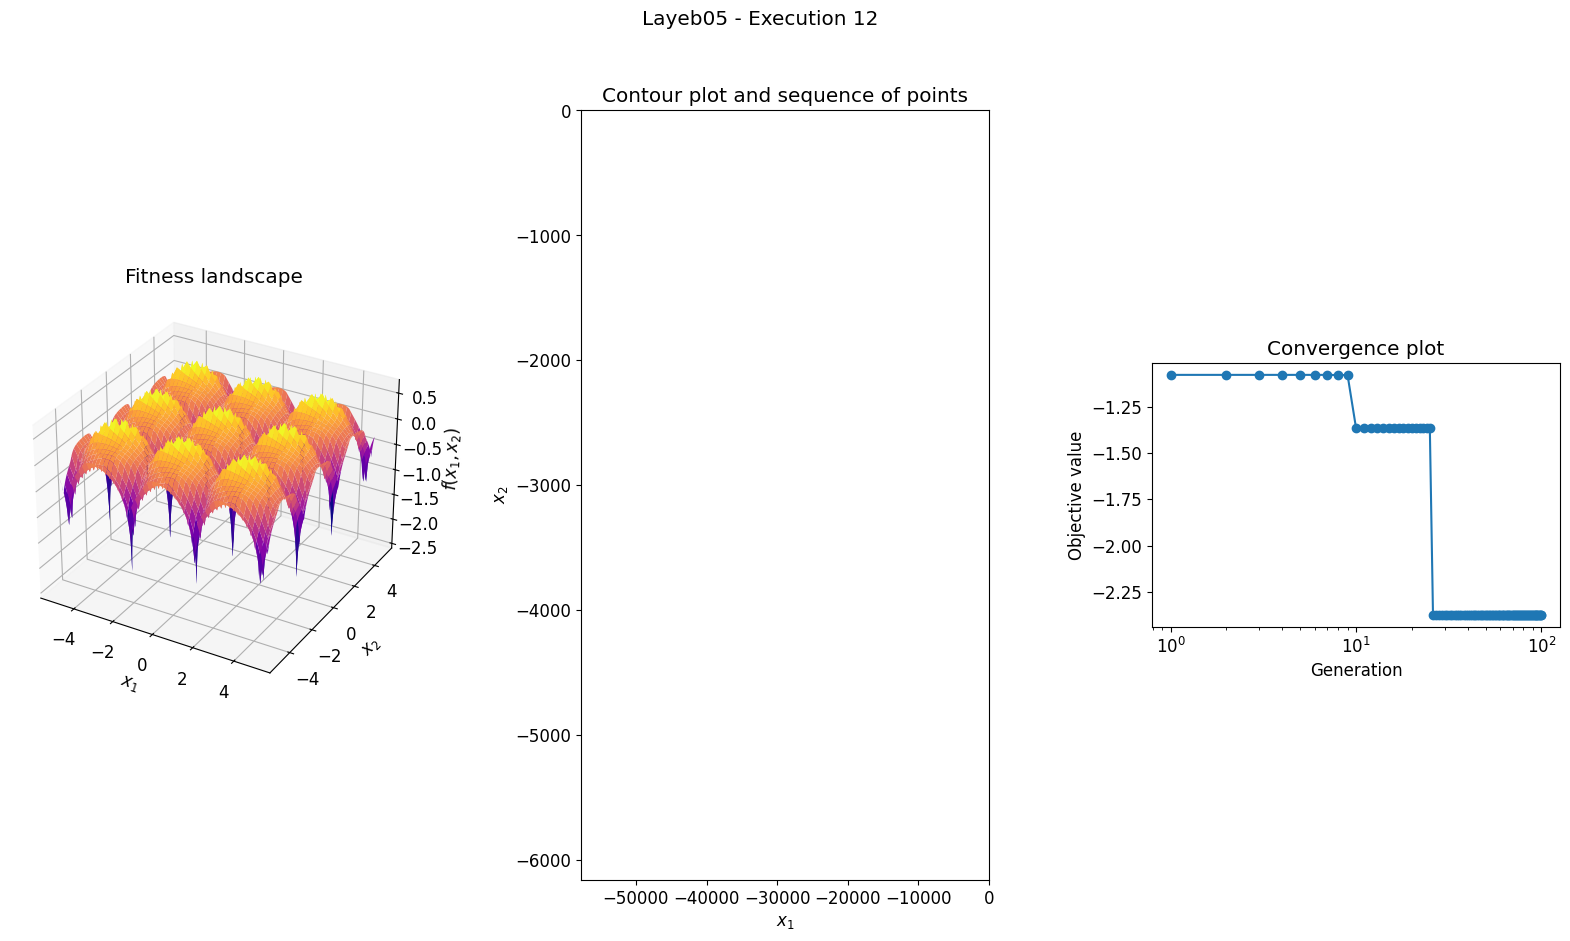

Execution 13  fitness= -1.8336862626941015 and feasibility is False


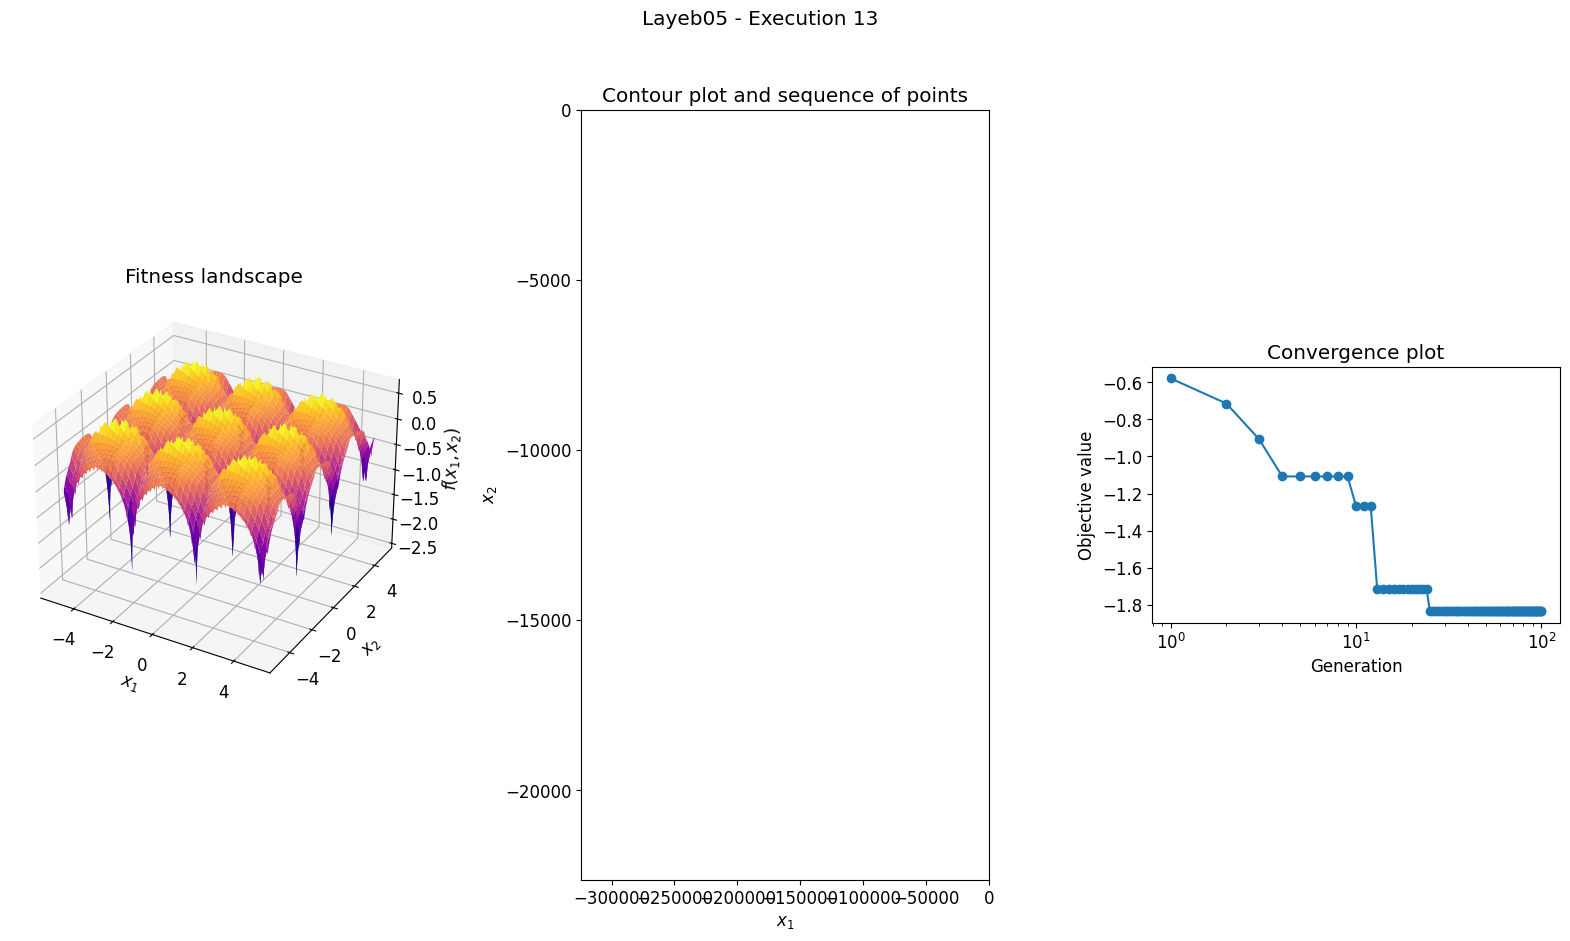

Execution 14  fitness= -1.5932673881463333 and feasibility is False


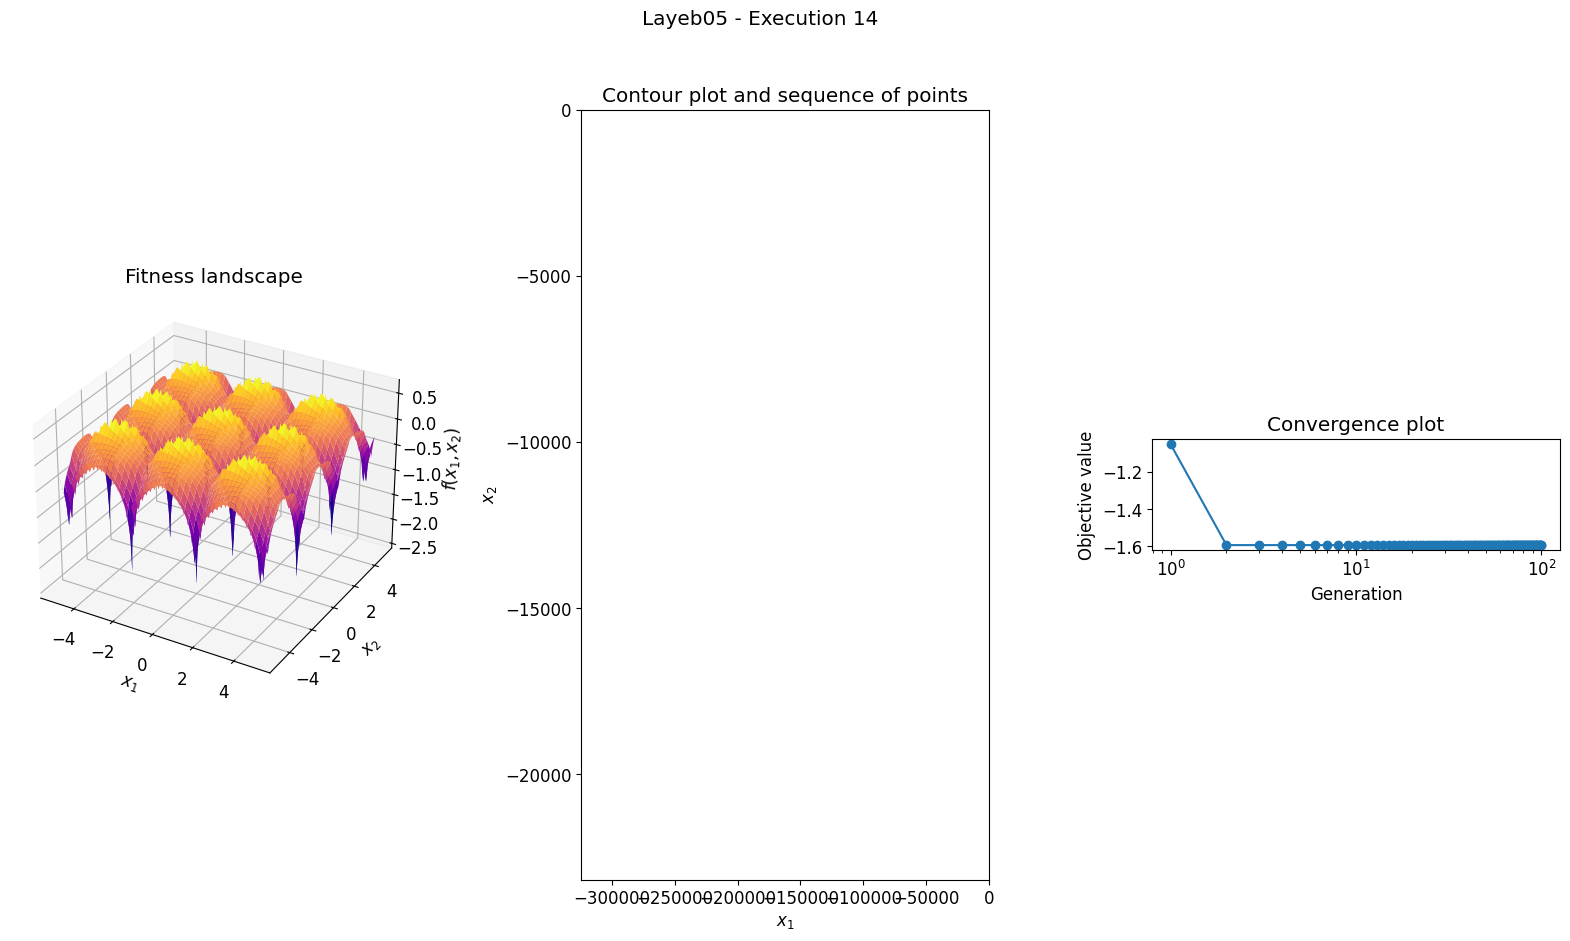

Execution 15  fitness= -2.1044528851019297 and feasibility is False


In [ ]:
experiment = Experiment('input/param1.cfg', 'Layeb05', 30)
experiment.execute_experiment(Layeb05_bounds_check, 'output/Layeb05.txt')

with open('output/Layeb05.txt', 'r') as file:
  fitness_best_sol = [float(line) for line in file.readlines()]

mean = np.mean(fitness_best_sol)
st_dev = np.std(fitness_best_sol)

pso_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

In [ ]:
experiment = Experiment('input/param1.cfg', 'Layeb10', 30)
experiment.execute_experiment(Layeb10_bounds_check, 'output/Layeb10.txt')

with open('output/Layeb10.txt', 'r') as file:
  fitness_best_sol = [float(line) for line in file.readlines()]

mean = np.mean(fitness_best_sol)
st_dev = np.std(fitness_best_sol)

pso_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

In [ ]:
experiment = Experiment('input/param1.cfg', 'Layenb15', 30)
experiment.execute_experiment(Layeb15_bounds_check, 'output/Layeb15.txt')

with open('output/Layeb15.txt', 'r') as file:
  fitness_best_sol = [float(line) for line in file.readlines()]

mean = np.mean(fitness_best_sol)
st_dev = np.std(fitness_best_sol)

pso_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

In [ ]:
experiment = Experiment('input/param1.cfg', 'Layeb18', 30)
experiment.execute_experiment(Layeb18_bounds_check, 'output/Layeb18.txt')

with open('output/Layeb18.txt', 'r') as file:
  fitness_best_sol = [float(line) for line in file.readlines()]

mean = np.mean(fitness_best_sol)
st_dev = np.std(fitness_best_sol)

pso_best_solutions.append(fitness_best_sol)

print(f'Mean: {mean}, Standard Deviation: {std_dev}')

In [ ]:
problems = ['Layeb05', 'Layeb10', 'Layeb15', 'Layeb18']

# Perform pairwise Wilcoxon rank-sum tests with Bonferroni correction
alpha = 0.05
adjusted_alpha = alpha / 3  # Bonferroni correction for three pairwise tests

for i in range(4):
    pso_results = pso_best_solutions[i]
    ga_results = ga_best_solutions[i]
    de_results = de_best_solutions[i]

    print(f"\nProblem {problems[i]}:")
    
    # PSO vs GA
    stat_pso_ga, p_value_pso_ga = ranksums(pso_results, ga_results)
    print(f"  PSO vs GA - Wilcoxon statistic: {stat_pso_ga}, p-value: {p_value_pso_ga}")
    if p_value_pso_ga < adjusted_alpha:
        better_algorithm = "PSO" if np.median(pso_results) < np.median(ga_results) else "GA"
        print(f"    Significant difference; {better_algorithm} is better.")
    else:
        print("    No significant difference between PSO and GA.")

    # PSO vs DE
    stat_pso_de, p_value_pso_de = ranksums(pso_results, de_results)
    print(f"  PSO vs DE - Wilcoxon statistic: {stat_pso_de}, p-value: {p_value_pso_de}")
    if p_value_pso_de < adjusted_alpha:
        better_algorithm = "PSO" if np.median(pso_results) < np.median(de_results) else "DE"
        print(f"    Significant difference; {better_algorithm} is better.")
    else:
        print("    No significant difference between PSO and DE.")

    # GA vs DE
    stat_ga_de, p_value_ga_de = ranksums(ga_results, de_results)
    print(f"  GA vs DE - Wilcoxon statistic: {stat_ga_de}, p-value: {p_value_ga_de}")
    if p_value_ga_de < adjusted_alpha:
        better_algorithm = "GA" if np.median(ga_results) < np.median(de_results) else "DE"
        print(f"    Significant difference; {better_algorithm} is better.")
    else:
        print("    No significant difference between GA and DE.")